# House Prices - Advanced Regression Techniques

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ----------------- 모델 ----------------------
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.linear_model import Ridge,Lasso

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

# Data Load

<pre>
● 날짜 관련 
  - ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
    
● 집 총평 
  - Overall 1 ~10  
  - Qual , QC, Qu, Cond {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}
  - ['OverallQual','OverallCond','KitchenQual','HeatingQC','FireplaceQu','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']     --> heatmap 확인

● 판매 관련 
  - ['SaleType','SaleCondition','MSSubClass','MSZoning','BldgType','HouseStyle','Functional']
  - MSSubClass(판매유형), MSZoning(용도구분), BldgType(주거유형), HouseStyle(주거스타일), 홈기능(Functional)
              
● 전용면적 
  - ['GrLivArea','1stFlrSF','2ndFlrSF','LotArea','LandSlope','LandContour']
  - Lot*,  GrLivArea(1stFlrSF,2ndFlrSF,LotArea), LandSlope(기울기), LandContour(평평도)
              
● 내부시설(구조물갯수,난방)
  - ['TotRmsAbvGrd','Bedroom','FullBath','HalfBath','Kitchen','Utilities','Heating','HeatingQC','Fireplaces','CentralAir','Electrical']
    
● 외부시설
  - porch*, WoodDeckSF
  - 지하실 : Bsmt*  
  - 차고지: Garage*
  - 공사진행여부 ['LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']  --> Feature importance 확인
  - 기타자산 Pool, Mise ['PoolArea','PoolQC','MiscVal','MiscFeature']    --> Pool  여부 확인
            
● 외장재
  - Exter* , MasVnr*, FenseRoof

● 도로 
  - 포장 : Street, PavedDrive, Alley      
  - 접근성 : Condition1, Condition2, Neighborhood
</pre>

<pre>
SalePrice - 부동산의 판매 가격(달러)입니다. 이것은 예측하려는 대상 변수입니다.
MSSubClass : 건물 등급(판매유형)
MSZoning : 일반적인 구역 분류(용도구분)
LotFrontage : 건물에 연결된 거리의 선형 피트
LotArea : 부지 크기(제곱피트)
Street : 도로 접근 유형
Alley : 골목 진입 방식
LotShape : 속성의 일반적인 모양
LandContour : 속성의 평탄도
Utilities : 사용 가능한 유틸리티 유형
LotConfig : 로트 구성
LandSlope : 속성의 기울기
Neighborhood  : Ames 시 경계 내의 물리적 위치
Condition1 : 간선도로 또는 철도와 인접
Condition2 : 주요 도로 또는 철도와의 근접성(두 번째가 있는 경우)
BldgType : 주거형태(주거유형)
HouseStyle : 주거 형태(주거스타일)
OverallQual : 전반적인 재료 및 마감 품질
OverallCond : 전반적인 상태 등급
YearBuilt : 원래 건설 날짜
YearRemodAdd : 리모델링 날짜
RoofStyle : 지붕의 종류
RoofMatl : 지붕재
Exterior1st : 주택 외부 피복재
Exterior2nd : 주택 외부 피복재(재료가 둘 이상인 경우)
MasVnrType : 석조 베니어 유형
MasVnrArea : 벽돌 베니어 영역(제곱피트)
ExterQual : 외장재 품질
ExterCond : 외부 자재의 현재 상태
Foundation : 기초의 종류
BsmtQual : 지하실의 높이
BsmtCond : 지하실의 일반적인 상태
BsmtExposure : 파업 또는 정원 수준 지하실 벽
BsmtFinType1 : 지하 마감면의 품질
BsmtFinSF1 : 유형 1 마감 평방 피트
BsmtFinType2 : 두 번째 완성된 영역의 품질(있는 경우)
BsmtFinSF2 : 유형 2 마감 평방 피트
BsmtUnfSF : 지하 공간의 미완성 평방 피트
TotalBsmtSF : 지하 면적의 총 평방 피트
Heating : 난방의 종류
HeatingQC : 난방 품질 및 상태
CentralAir : 중앙 에어컨
Electrical : 전기시스템
1stFlrSF : 1층 평방 피트
2ndFlrSF : 2층 평방 피트
LowQualFinSF : 저품질 마감 평방 피트(모든 층)
GrLivArea : 지상(지상) 거실 면적 평방피트
BsmtFullBath : 지하 전체 욕실
BsmtHalfBath : 지하 반 욕실
FullBath : 지상 위의 전체 욕실
HalfBath : 지상 반욕
Bedroom : 지하층 위의 침실 수
Kitchen : 주방 수
KitchenQual : 주방 품질
TotRmsAbvGrd : 지상 위의 총 객실 수(욕실 제외)
Functional : 홈 기능 등급
Fireplaces : 벽난로 수
FireplaceQu : 벽난로 품질
GarageType : 차고 위치
GarageYrBlt : 차고가 건설된 연도
GarageFinish : 차고 내부 마감
GarageCars : 차량 수용 가능 차고의 크기
GarageArea : 평방 피트 단위의 차고 크기
GarageQual : 차고 품질
GarageCond : 차고 조건
PavedDrive : 포장된 진입로
WoodDeckSF : 목재 데크 면적(제곱피트)
OpenPorchSF : 평방 피트 단위의 열린 베란다 영역
EnclosedPorch : 평방피트 단위의 닫힌 현관 면적
3SsnPorch : 제곱피트의 3계절 베란다 면적
ScreenPorch : 스크린 베란다 면적(제곱피트)
PoolArea : 풀 면적(평방피트)
PoolQC : 수영장 품질
Fence : 울타리 품질
MiscFeature : 다른 범주에서 다루지 않는 기타 기능
MiscVal : 기타 기능의 $Value
MoSold : 판매 월
YrSold : 판매 연도
SaleType : 판매 유형
SaleCondition : 판매 조건

<pre>
1. train.csv : 학습 데이터

id : 데이터 고유 id
OverallQual : 전반적 재료와 마감 품질
YearBuilt : 완공 연도
YearRemodAdd : 리모델링 연도
ExterQual : 외관 재료 품질
BsmtQual : 지하실 높이
TotalBsmtSF : 지하실 면적 
1stFlrSF : 1층 면적 
GrLivArea : 지상층 생활 면적
FullBath : 지상층 화장실 개수 
KitchenQual : 부억 품질 
GarageYrBlt : 차고 완공 연도
GarageCars: 차고 자리 개수
GarageArea: 차고 면적 
target : 집값(달러 단위)


2.test.csv

id : 데이터 고유 id
OverallQual : 전반적 재료와 마감 품질
YearBuilt : 완공 연도
YearRemodAdd : 리모델링 연도
ExterQual : 외관 재료 품질
BsmtQual : 지하실 높이
TotalBsmtSF : 지하실 면적 
1stFlrSF : 1층 면적 
GrLivArea : 지상층 생활 면적
FullBath : 지상층 화장실 개수 
KitchenQual : 부억 품질 
GarageYrBlt : 차고 완공 연도
GarageCars: 차고 자리 개수
GarageArea: 차고 면적

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submit=pd.read_csv('sample_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

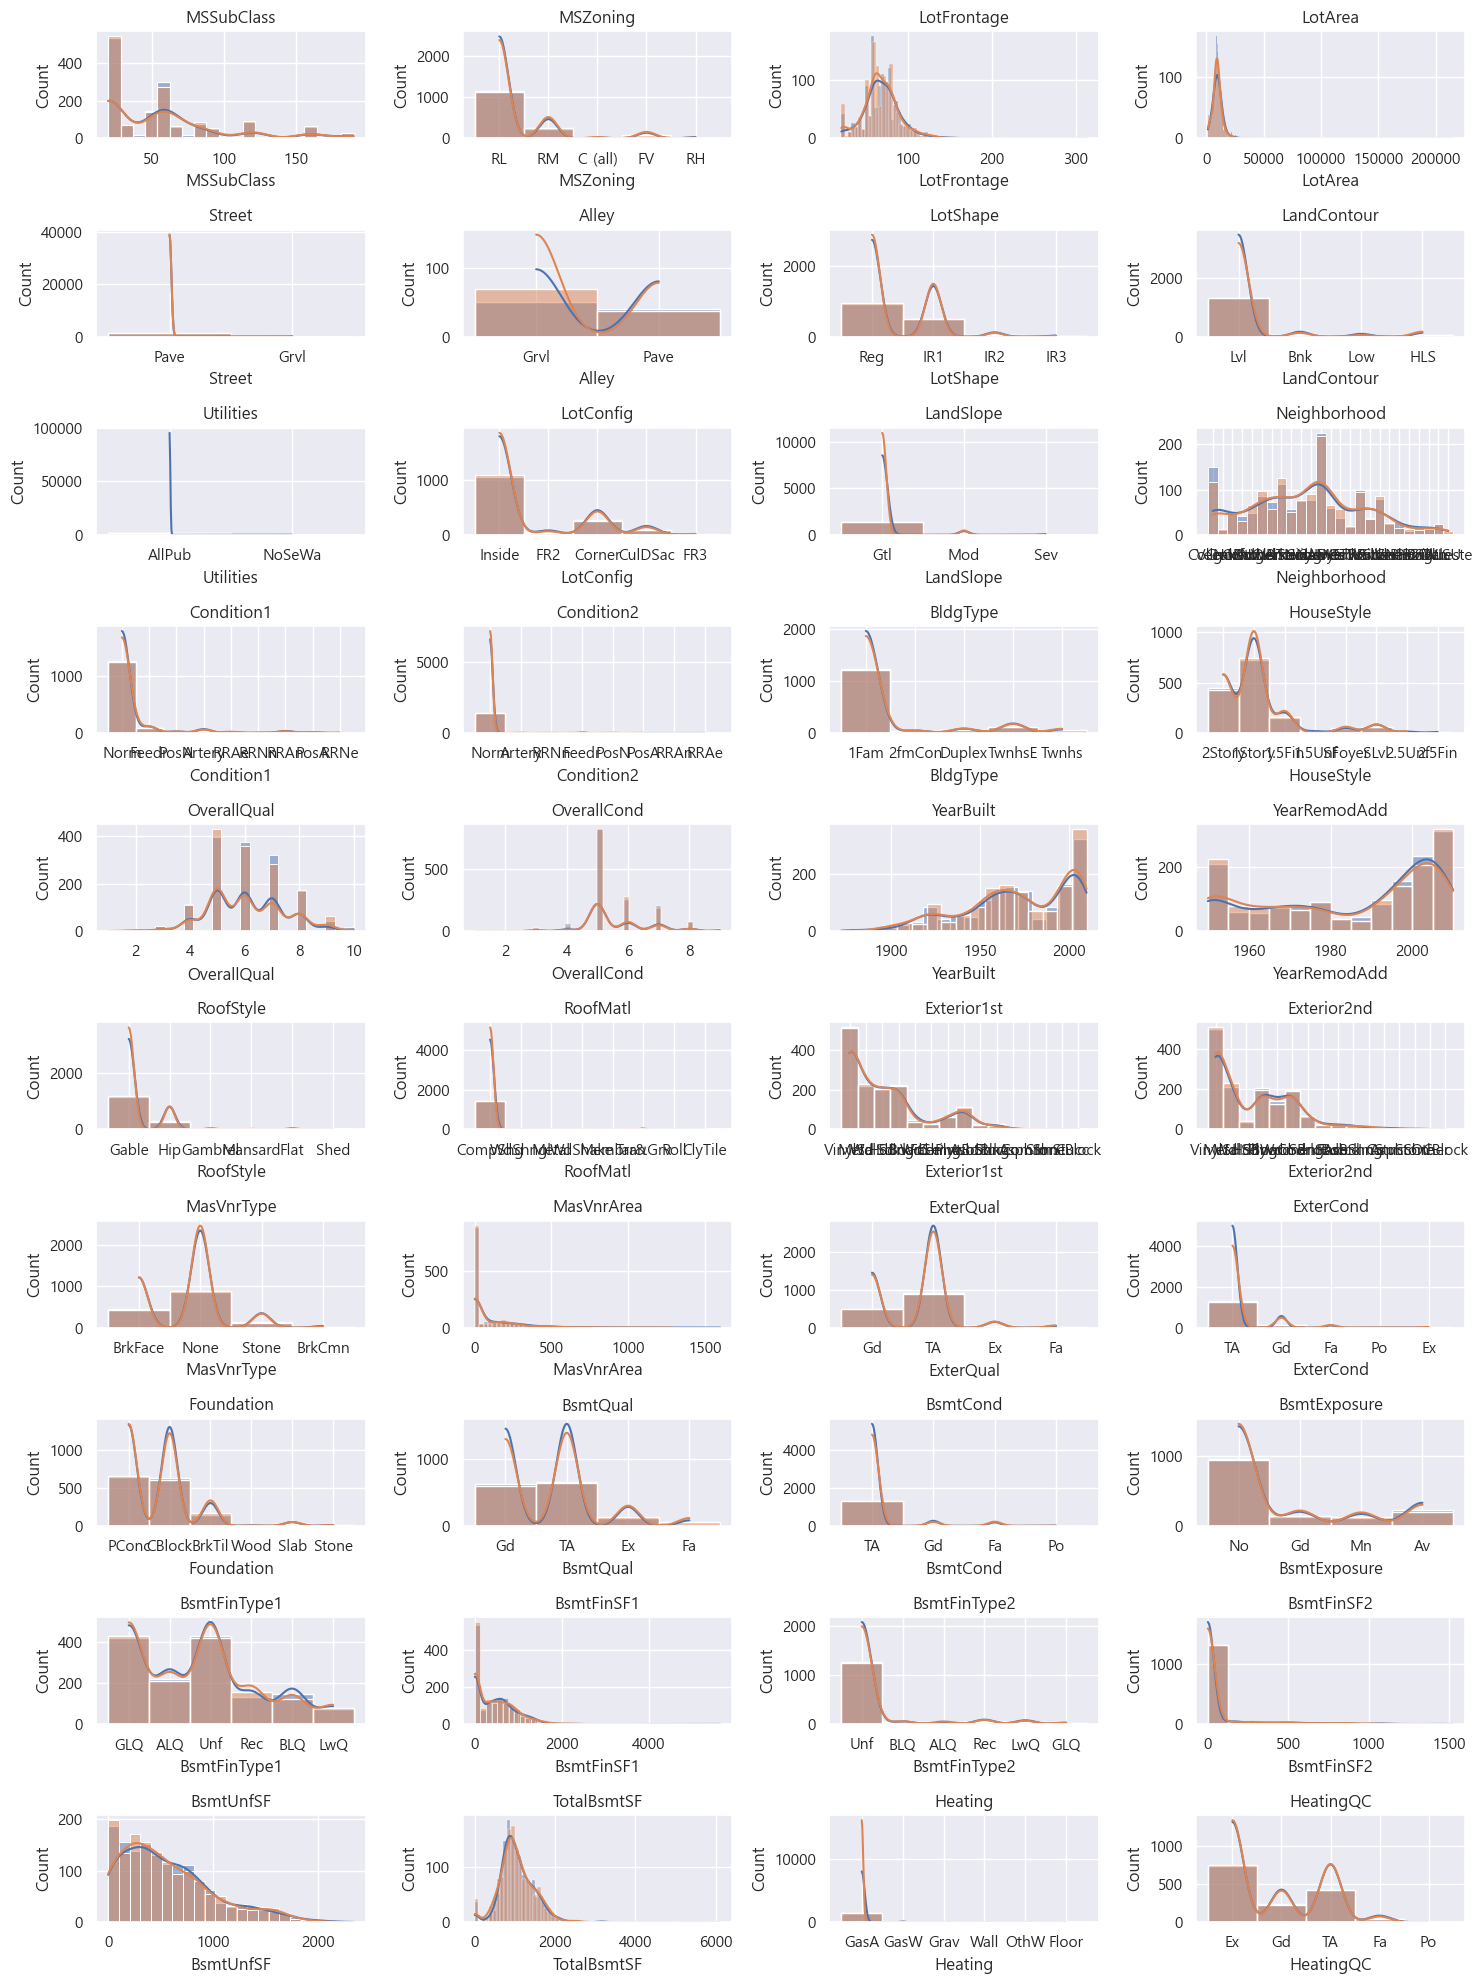

In [4]:
fig, axes = plt.subplots(10, 4, figsize=(15, 20)  ) 

col_list = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.histplot(data=train, x=col, ax=axes[r][c],     kde=True )
    sns.histplot(data=test, x=col, ax=axes[r][c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

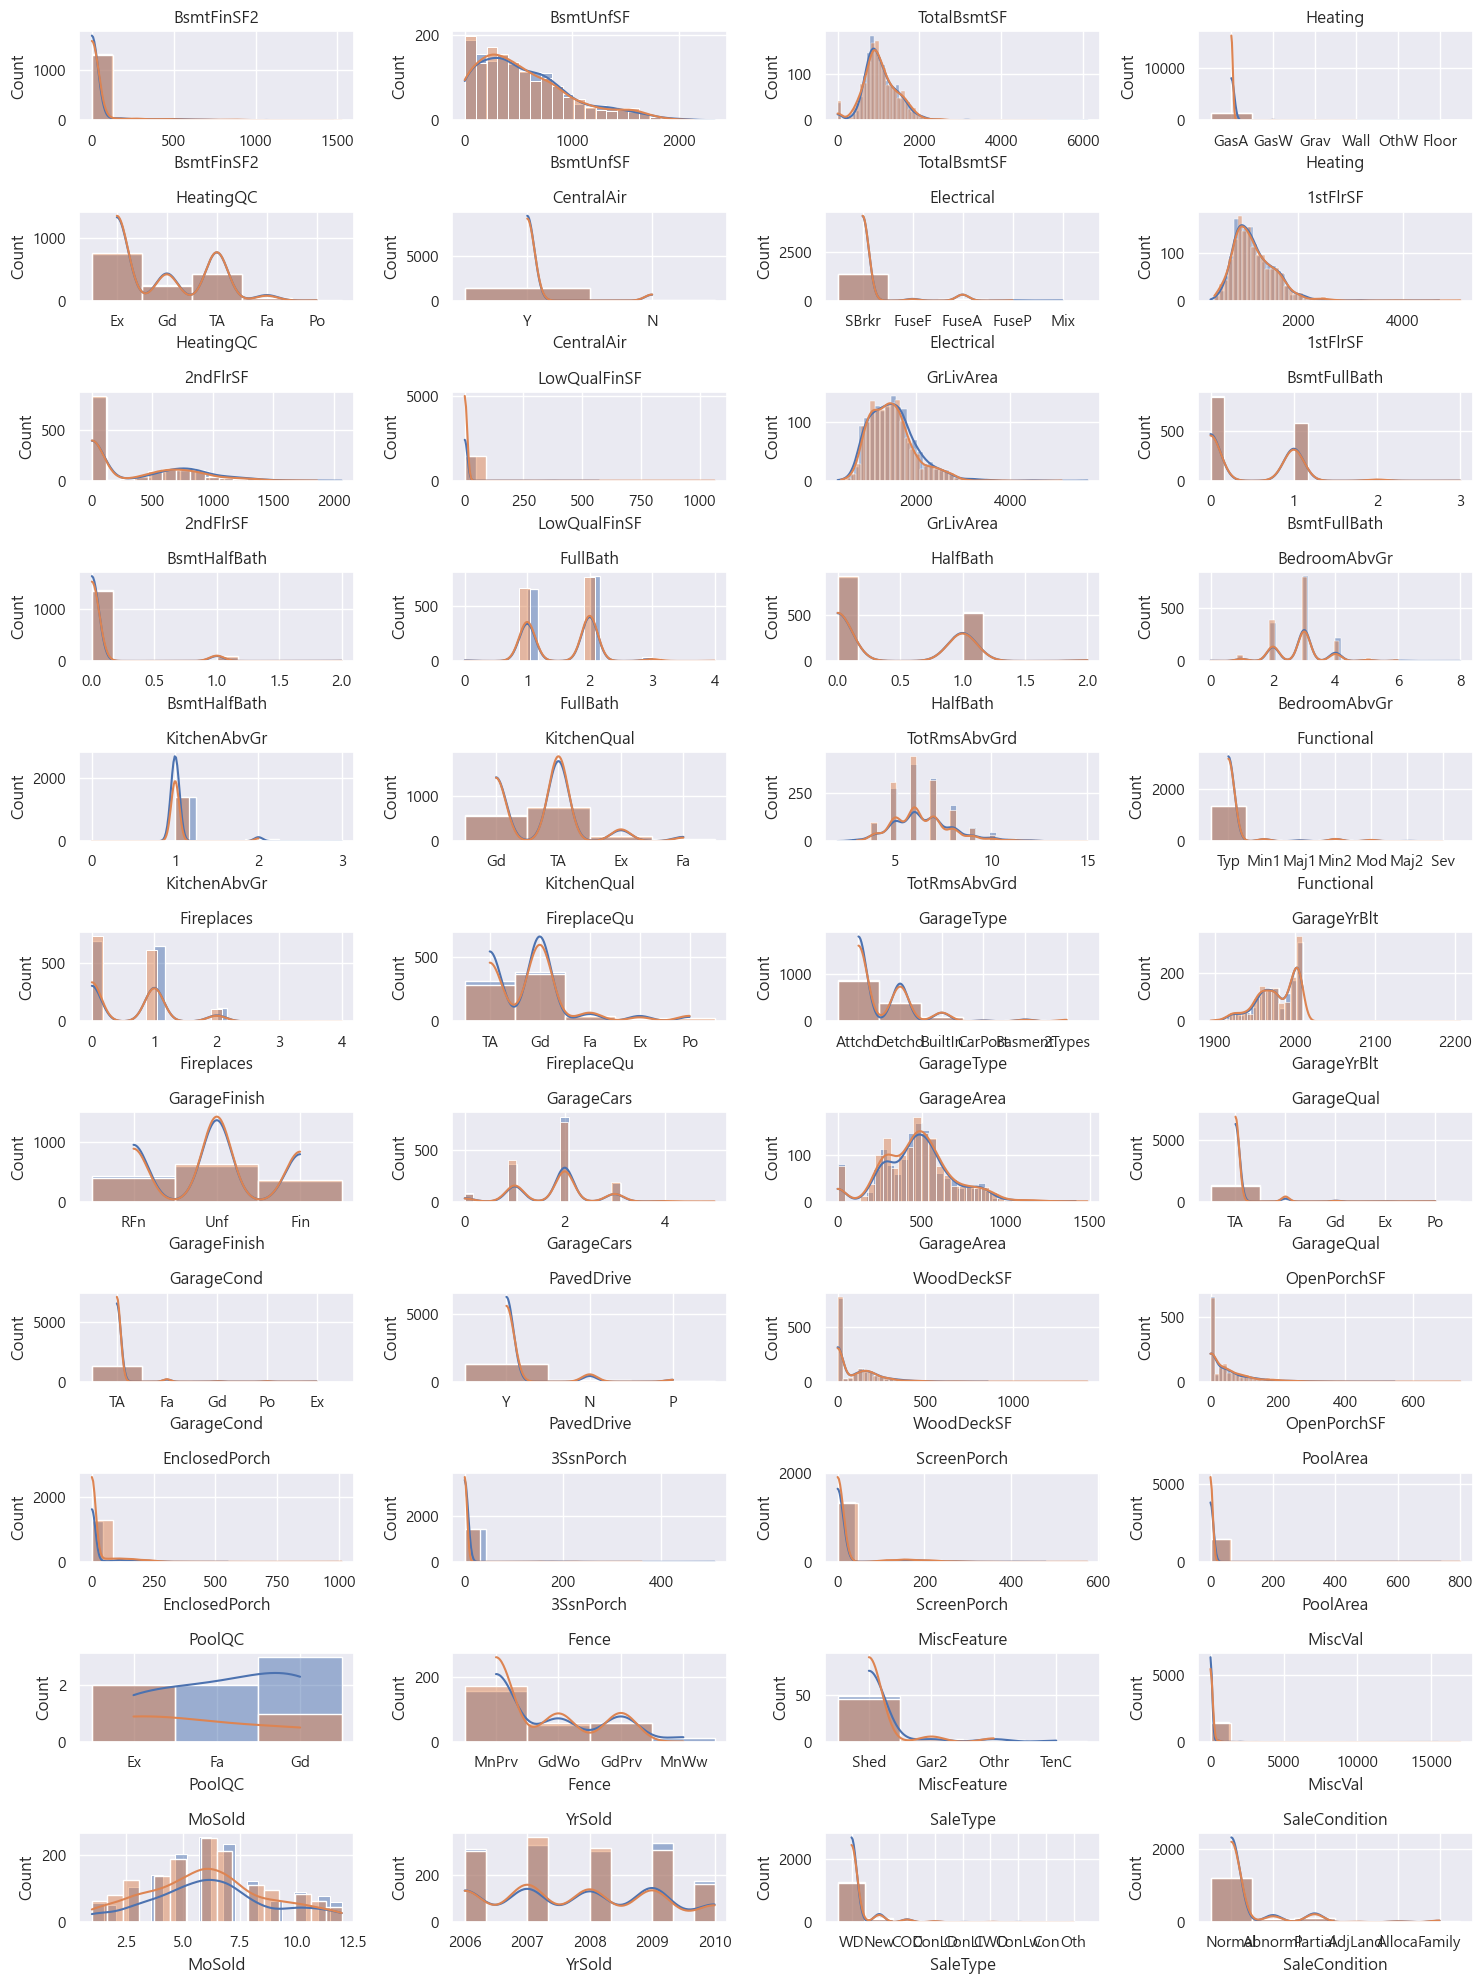

In [5]:
fig, axes = plt.subplots(11, 4, figsize=(15, 20)  ) 

col_list = [
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.histplot(data=train, x=col, ax=axes[r][c],     kde=True )
    sns.histplot(data=test, x=col, ax=axes[r][c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

In [6]:
train=train.drop('Id',axis=1)
test=test.drop('Id',axis=1)

# EDA

## hist

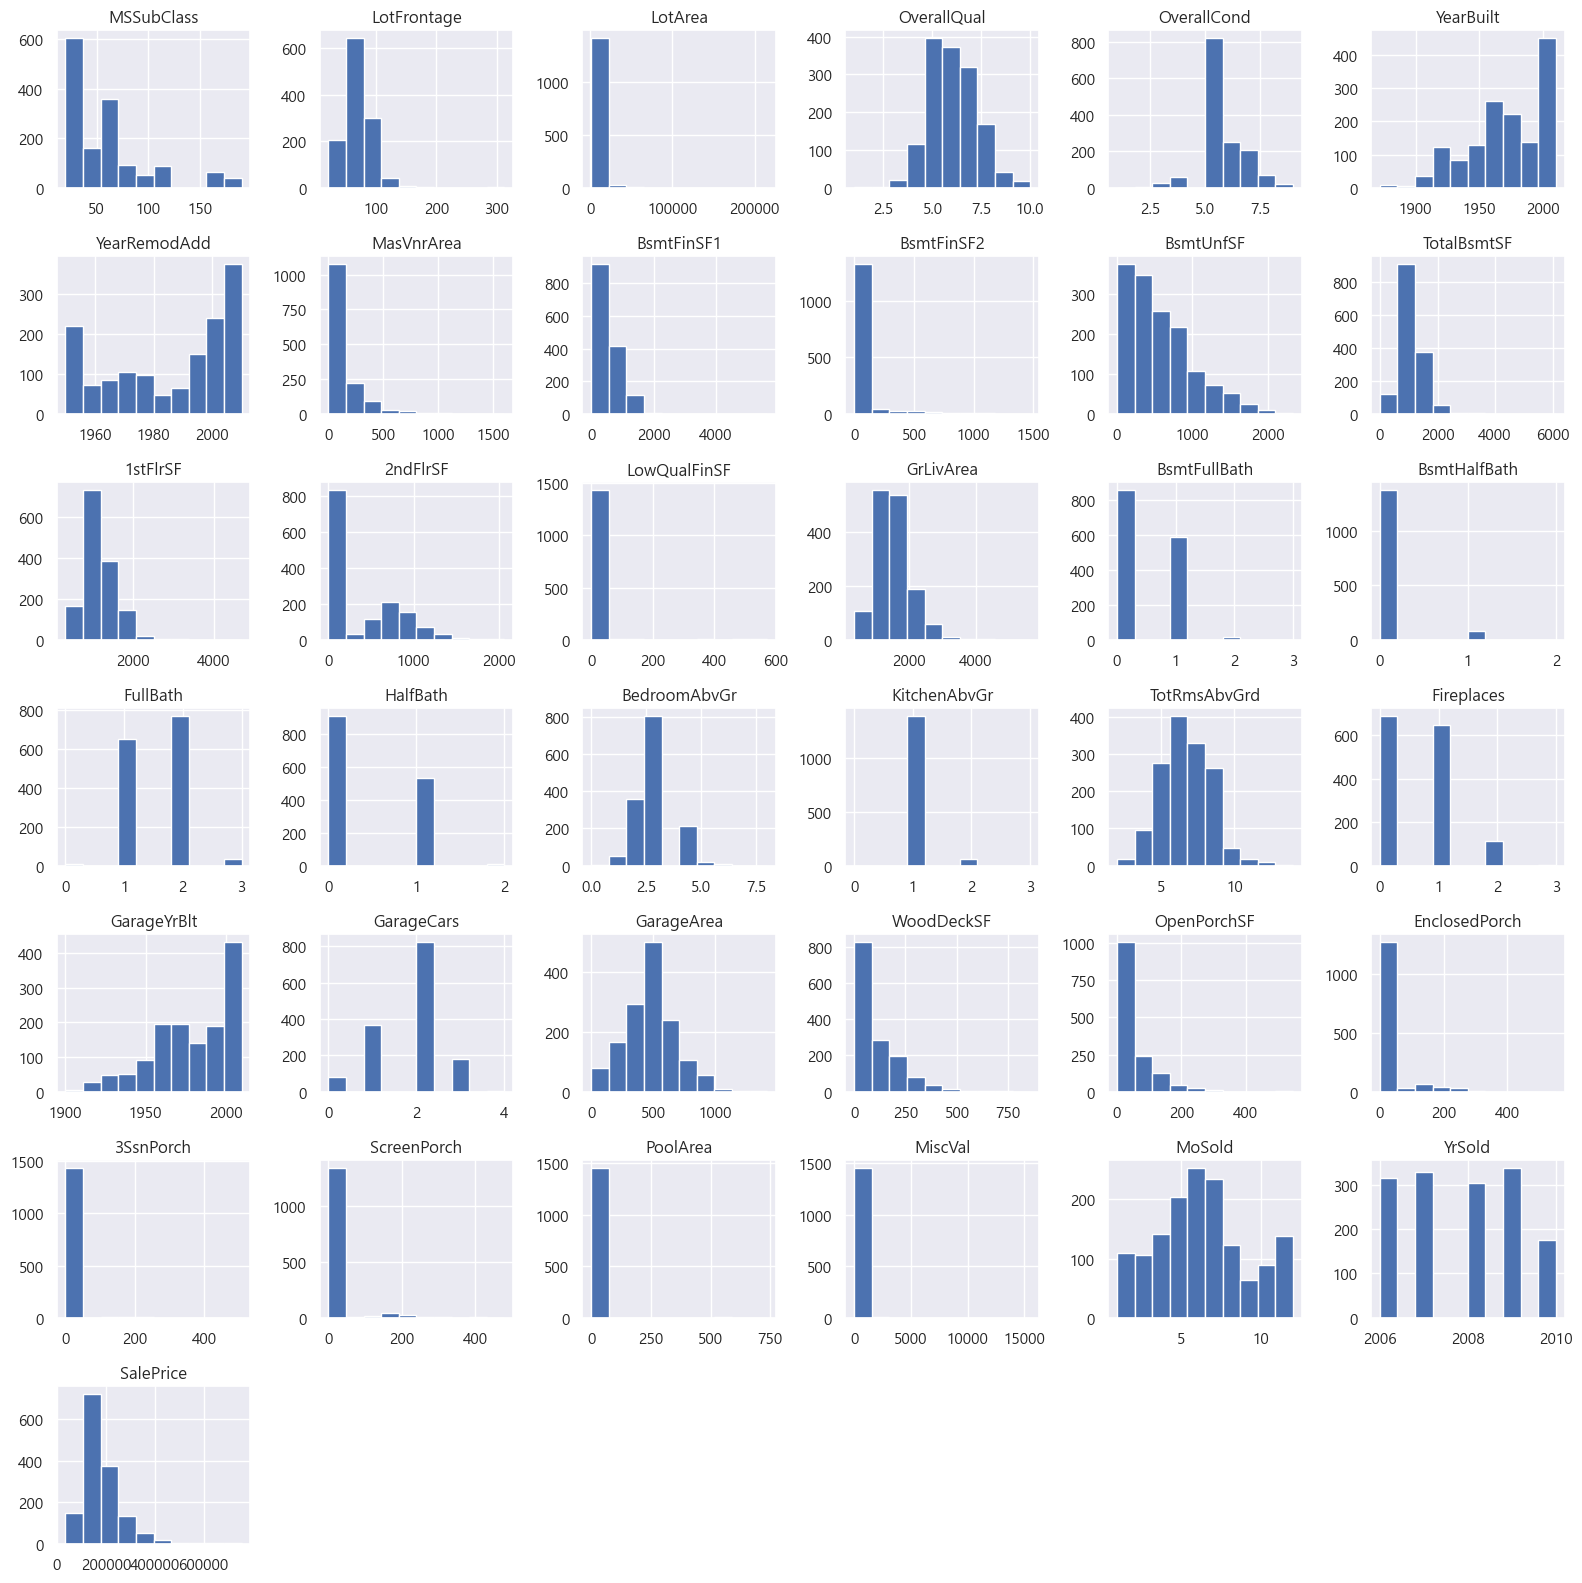

In [7]:
train.hist(figsize=(16,16))

plt.tight_layout()
plt.show()

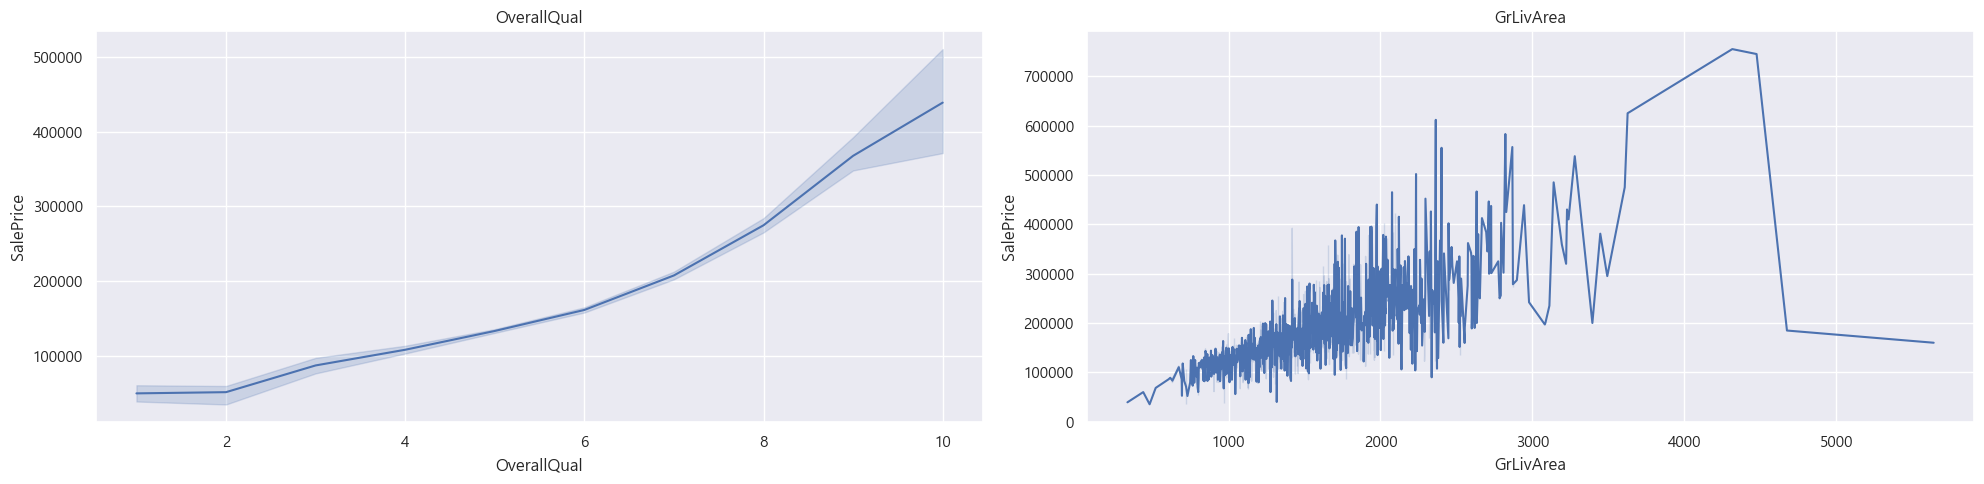

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)  ) 

col_list = ['OverallQual','GrLivArea']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[c].set_title(col)
    sns.lineplot(data=train, x=col, y='SalePrice' ,ax=axes[c] )
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

In [9]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(train, title='House Prices - Advanced Regression Techniques')
# profile.to_file(output_file='Kaggle.html')

# 결측 채우기

In [10]:
# train.info() # 1460

In [11]:
train.isna().sum()[train.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
train['Functional'] = train['Functional'].fillna('Typ')
train['Electrical'] = train['Electrical'].fillna("SBrkr")
# train['KitchenQual'] = train['KitchenQual'].fillna("TA")
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train["Alley"] = train["Alley"].fillna("None")
# train['FireplaceQu'] = train['FireplaceQu'].fillna("None")
train['Fence'] = train['Fence'].fillna("None")
train['MiscFeature'] = train['MiscFeature'].fillna("None")
train['MasVnrType'] = train['MasVnrType'].fillna("None")
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

train[['FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtQual','BsmtCond']]=train[['FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtQual','BsmtCond']].fillna(0)
train[['KitchenQual','HeatingQC','FireplaceQu','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']]=train[['KitchenQual','HeatingQC','FireplaceQu',
                                                                                                                                         'ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']].replace(['Ex' , 'Gd' , 'TA' ,'Fa' ,'Po' ],[5,4,3,2,1])

for col in ('GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish']:
    train[col] = train[col].fillna('None')
    
for col in ('BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','BsmtUnfSF', 'TotalBsmtSF'):
    train[col] = train[col].fillna(0)

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())

In [13]:
test['Functional'] = test['Functional'].fillna('Typ')
test['Electrical'] = test['Electrical'].fillna("SBrkr")
# train['KitchenQual'] = train['KitchenQual'].fillna("TA")
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test["Alley"] = test["Alley"].fillna("None")
# train['FireplaceQu'] = train['FireplaceQu'].fillna("None")
test['Fence'] = test['Fence'].fillna("None")
test['MiscFeature'] = test['MiscFeature'].fillna("None")
test['MasVnrType'] = test['MasVnrType'].fillna("None")
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())

test[['FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtQual','BsmtCond']]=test[['FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtQual','BsmtCond']].fillna(0)
test[['KitchenQual','HeatingQC','FireplaceQu','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']]=test[['KitchenQual','HeatingQC','FireplaceQu',
                                                                                                                                         'ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']].replace(['Ex' , 'Gd' , 'TA' ,'Fa' ,'Po' ],[5,4,3,2,1])

for col in ('GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish']:
    test[col] = test[col].fillna('None')
    
for col in ('BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna('None')
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','BsmtUnfSF', 'TotalBsmtSF'):
    test[col] = test[col].fillna(0)

test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

## 평가관련 피쳐

> train[['KitchenQual','HeatingQC','FireplaceQu','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']]
- Ex : Excellent   -->5
- Gd : Good  -->4
- TA : Typical/Average  -->3
- Fa : Fair  -->2
- Po : Poor  -->1
- NA : X  -->0

In [14]:
train[['FireplaceQu','GarageQual','GarageCond','PoolQC','BsmtQual','BsmtCond']].isna().sum()

FireplaceQu    0
GarageQual     0
GarageCond     0
PoolQC         0
BsmtQual       0
BsmtCond       0
dtype: int64

In [15]:
train[['KitchenQual','HeatingQC','FireplaceQu','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']].value_counts()

KitchenQual  HeatingQC  FireplaceQu  ExterQual  ExterCond  BsmtQual  BsmtCond  GarageQual  GarageCond  PoolQC
3            3          0            3          3          3         3         3           3           0         118
4            5          0            4          3          4         3         3           3           0         112
                        4            4          3          4         3         3           3           0          86
                        3            4          3          4         3         3           3           0          76
3            5          0            3          3          3         3         3           3           0          38
                                                                                                                ... 
             4          3            3          4          4         3         3           3           0           1
                                                3          4         4 

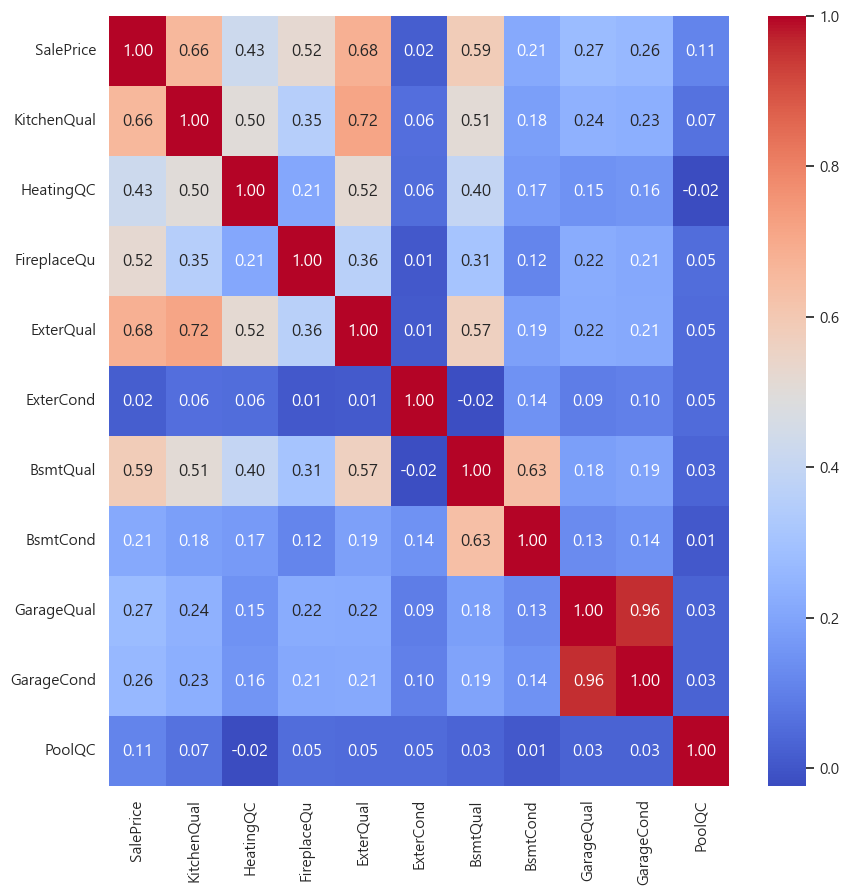

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(train[['SalePrice','KitchenQual','HeatingQC','FireplaceQu','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']].corr(), fmt=".2f", annot=True, cmap='coolwarm')
plt.show()

In [17]:
train['PoolQC'].value_counts()

0    1453
4       3
5       2
2       2
Name: PoolQC, dtype: int64

# 1차 점수보기

In [18]:
train.dtypes.value_counts()
# print(train.select_dtypes(include=['int32','int64','float64']).columns)   # 수치형
print(train.select_dtypes(include=['int','float']).columns)
print(train.select_dtypes(exclude=['int','float']).columns)   # 카테고리

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType',

<pre>
train_test1=train_test1[['Condition2_PosN', 'MiscFeature_Gar2', 'Heating_OthW',
       'RoofMatl_Roll', 'SaleType_Oth', 'HouseStyle_2.5Unf',
       'Exterior1st_CemntBd', 'RoofMatl_WdShake', 'Neighborhood_ClearCr',
       'RoofMatl_Tar&Grv', 'Foundation_Stone', 'Neighborhood_SWISU',
       'Exterior2nd_Other', 'Functional_Min1', 'Condition2_Feedr','SalePrice_log', 'Condition2_RRAe', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'MiscFeature_Othr', 'Condition2_PosA',
       'MSZoning_C (all)', 'MiscFeature_None', 'Condition2_Artery',
       'SaleType_CWD', 'MiscFeature_Shed', 'Functional_Maj2',
       'LotConfig_FR3', 'Condition2_Norm', 'Heating_Grav']]

# 파생피쳐

## 수영장,벽난로, 지하실,차고 여부에 따른 집값

In [19]:
train['SalePrice'][train['PoolQC']>0].describe()

count         7.000000
mean     288138.571429
std      206071.850935
min      160000.000000
25%      176000.000000
50%      235000.000000
75%      262485.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [20]:
train['SalePrice'][train['PoolQC']==0].describe()

count      1453.000000
mean     180404.663455
std       78168.872519
min       34900.000000
25%      129900.000000
50%      162900.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [21]:
train['Fireplace_y_n']=np.where(train['FireplaceQu']==0, 0, 1)
train['Bsmt_y_n']=np.where(train['BsmtQual']==0, 0, 1)
train['Garage_y_n']=np.where(train['GarageQual']==0, 0, 1)
train['Pool_y_n']=np.where(train['PoolQC']==0, 0, 1)

In [22]:
test['Fireplace_y_n']=np.where(test['FireplaceQu']==0, 0, 1)
test['Bsmt_y_n']=np.where(test['BsmtQual']==0, 0, 1)
test['Garage_y_n']=np.where(test['GarageQual']==0, 0, 1)
test['Pool_y_n']=np.where(test['PoolQC']==0, 0, 1)

In [23]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          4          3      PConc         4         3   
1         0.0          3          3     CBlock         4         3   
2       162.0          4          3      PConc         4         3   
3         0.0          3          3     BrkTil         3         4   
4       350.0          4          3      PConc         4         3   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA          5          Y      SBrkr       856       854   
1         1262    GasA          5          Y      SBrkr      1262         0   
2          920    GasA          5          Y      SBrkr       920       866   
3          756    GasA          4          Y      SBrkr       961       756   
4         1145    GasA          5          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0             3             1            4             8        Typ   
1             3             1            3             6        Typ   
2             3             1            4             6        Typ   
3             3             1            4             7        Typ   
4             4             1            4             9        Typ   

   Firepla

In [24]:
y_n_df=pd.DataFrame(train[['Fireplace_y_n','Bsmt_y_n','Garage_y_n','Pool_y_n','SalePrice']])
y_n_df.head()

Fireplace_y_n  Bsmt_y_n  Garage_y_n  Pool_y_n  SalePrice
0              0         1           1         0     208500
1              1         1           1         0     181500
2              1         1           1         0     223500
3              1         1           1         0     140000
4              1         1           1         0     250000

In [25]:
train[['Fireplace_y_n','Bsmt_y_n','Garage_y_n','Pool_y_n']].value_counts().sort_index()

Fireplace_y_n  Bsmt_y_n  Garage_y_n  Pool_y_n
0              0         0           0             6
                         1           0            22
               1         0           0            66
                         1           0           596
1              0         0           0             1
                         1           0             8
               1         0           0             8
                         1           0           746
                                     1             7
dtype: int64

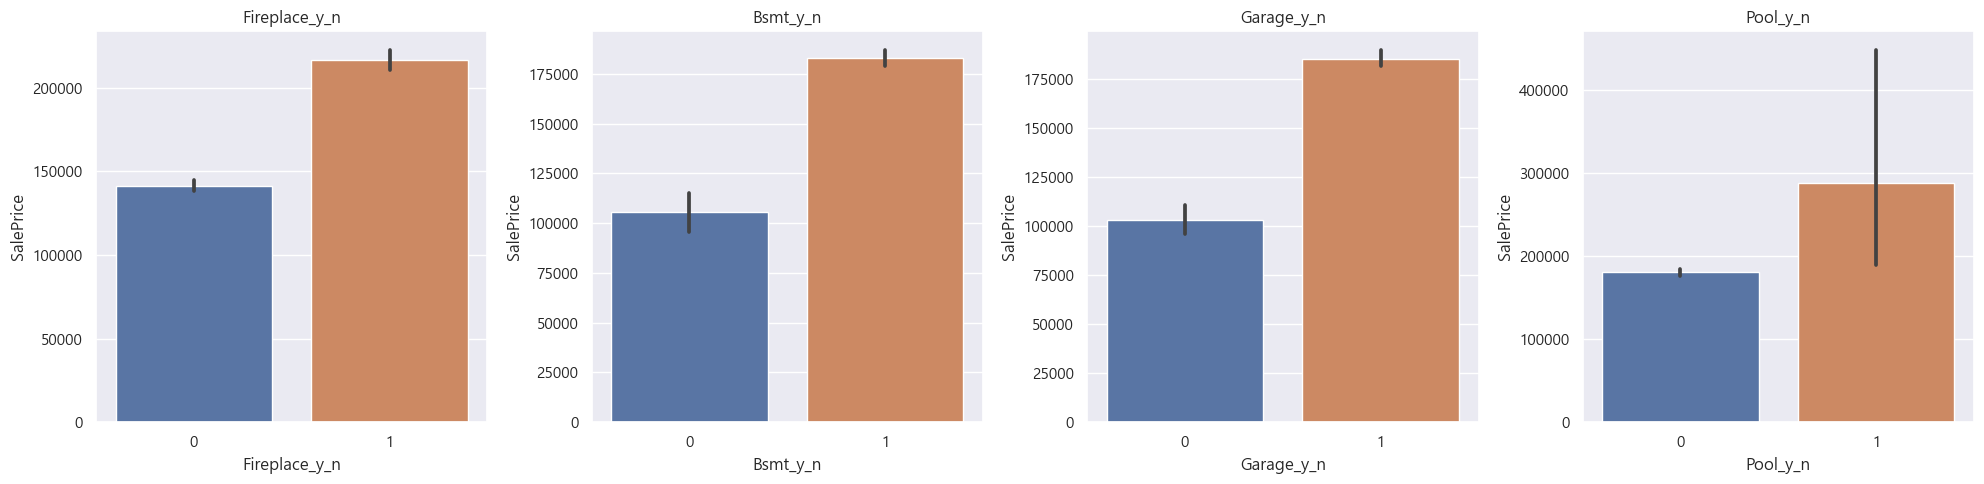

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5)  ) 

col_list = ['Fireplace_y_n','Bsmt_y_n','Garage_y_n','Pool_y_n']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[c].set_title(col)
    sns.barplot(data=train, x=col, y='SalePrice' ,ax=axes[c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

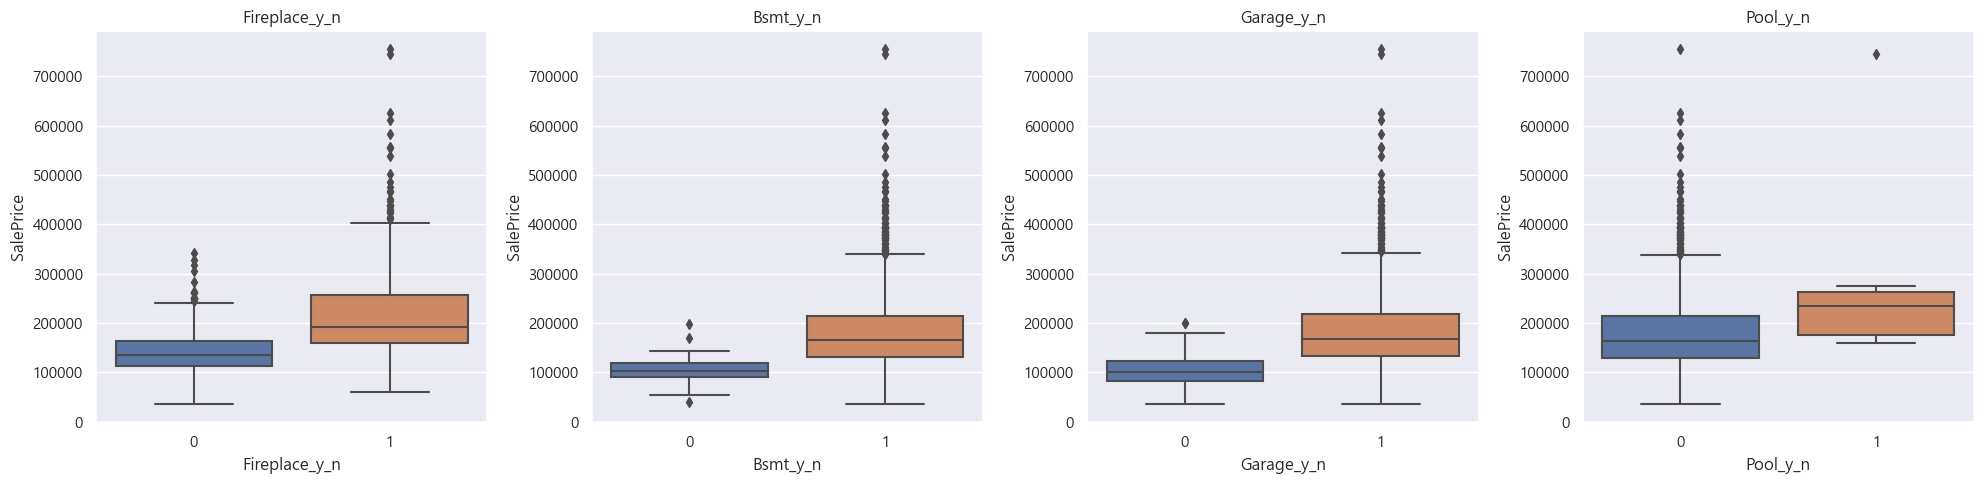

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5)  ) 

col_list = ['Fireplace_y_n','Bsmt_y_n','Garage_y_n','Pool_y_n']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

In [28]:
train['Pool_y_n'].value_counts()

0    1453
1       7
Name: Pool_y_n, dtype: int64

## 옵션개수에 따른 집값

In [29]:
y_n_df.columns

Index(['Fireplace_y_n', 'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n', 'SalePrice'], dtype='object')

In [30]:
y_n_df['opt']=y_n_df['Fireplace_y_n']+y_n_df['Bsmt_y_n']+y_n_df['Garage_y_n']+y_n_df['Pool_y_n']

In [31]:
train['opt']=train['Fireplace_y_n']+train['Bsmt_y_n']+train['Garage_y_n']+train['Pool_y_n']

In [32]:
test['opt']=test['Fireplace_y_n']+test['Bsmt_y_n']+test['Garage_y_n']+test['Pool_y_n']

In [33]:
y_n_df['opt'].value_counts()

3    746
2    612
1     89
4      7
0      6
Name: opt, dtype: int64

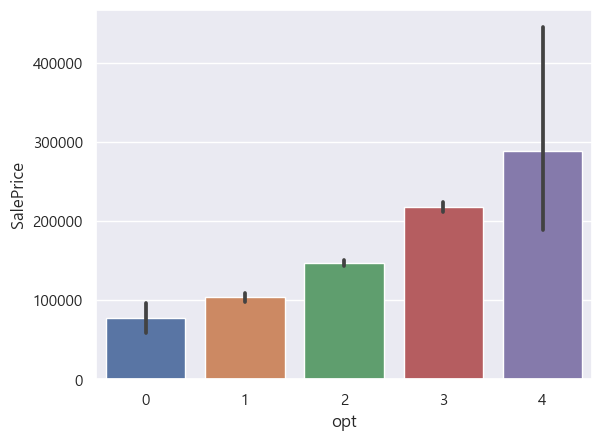

In [34]:
sns.barplot(data=y_n_df, x='opt',y='SalePrice')
plt.show()

- pool 완전 옵션
- pool의 여부에따라 가격 차이가 큼

In [35]:
y_n_df[['Fireplace_y_n', 'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n','SalePrice']][y_n_df['opt']==0]

Fireplace_y_n  Bsmt_y_n  Garage_y_n  Pool_y_n  SalePrice
39                0         0           0         0      82000
520               0         0           0         0     106250
533               0         0           0         0      39300
705               0         0           0         0      55000
1011              0         0           0         0     100000
1218              0         0           0         0      80500

In [36]:
y_n_df[['Fireplace_y_n', 'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n']][y_n_df['opt']==1].value_counts() # opt==1 --> pool 없음

Fireplace_y_n  Bsmt_y_n  Garage_y_n  Pool_y_n
0              1         0           0           66
               0         1           0           22
1              0         0           0            1
dtype: int64

In [37]:
y_n_df[['Fireplace_y_n', 'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n']][y_n_df['opt']==2].value_counts() # opt==2 --> pool 없음

Fireplace_y_n  Bsmt_y_n  Garage_y_n  Pool_y_n
0              1         1           0           596
1              0         1           0             8
               1         0           0             8
dtype: int64

In [38]:
y_n_df[['Fireplace_y_n', 'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n']][y_n_df['opt']==3].value_counts() # opt==3 --> pool 없음

Fireplace_y_n  Bsmt_y_n  Garage_y_n  Pool_y_n
1              1         1           0           746
dtype: int64

In [39]:
y_n_df[['Fireplace_y_n', 'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n']][y_n_df['opt']==4].value_counts()

Fireplace_y_n  Bsmt_y_n  Garage_y_n  Pool_y_n
1              1         1           1           7
dtype: int64

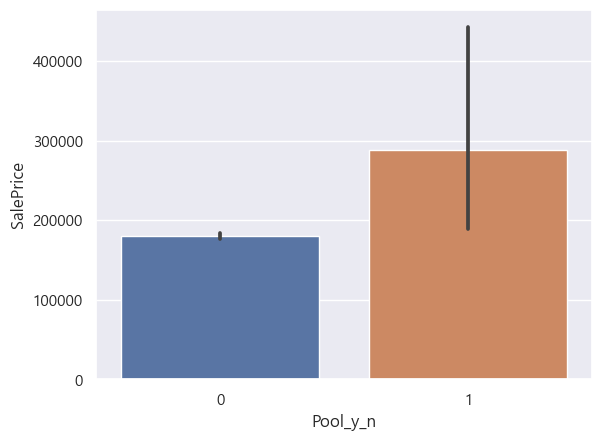

In [40]:
sns.barplot(data=y_n_df, x='Pool_y_n', y='SalePrice' )
plt.show()

<AxesSubplot: >

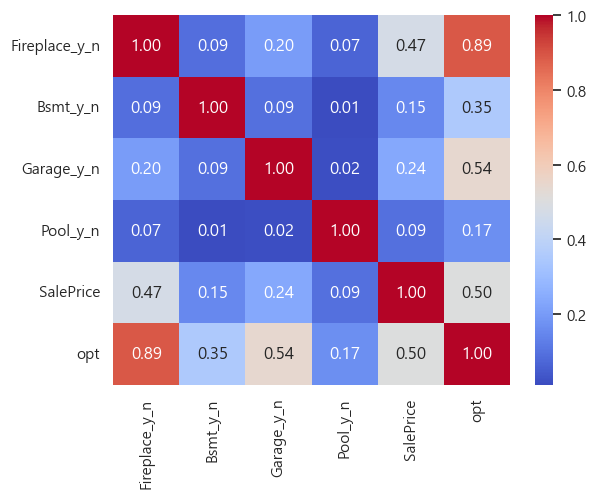

In [41]:
sns.heatmap(y_n_df.corr(), fmt=".2f", annot=True, cmap='coolwarm')

##  판매 관련 
  - ['SaleType','SaleCondition','MSSubClass','MSZoning','BldgType','HouseStyle','Functional']
  - MSSubClass(판매유형), MSZoning(용도구분), BldgType(주거유형), HouseStyle(주거스타일), 홈기능(Functional)

### 'SaleType','SaleCondition','MSSubClass','MSZoning','BldgType','HouseStyle','Functional'

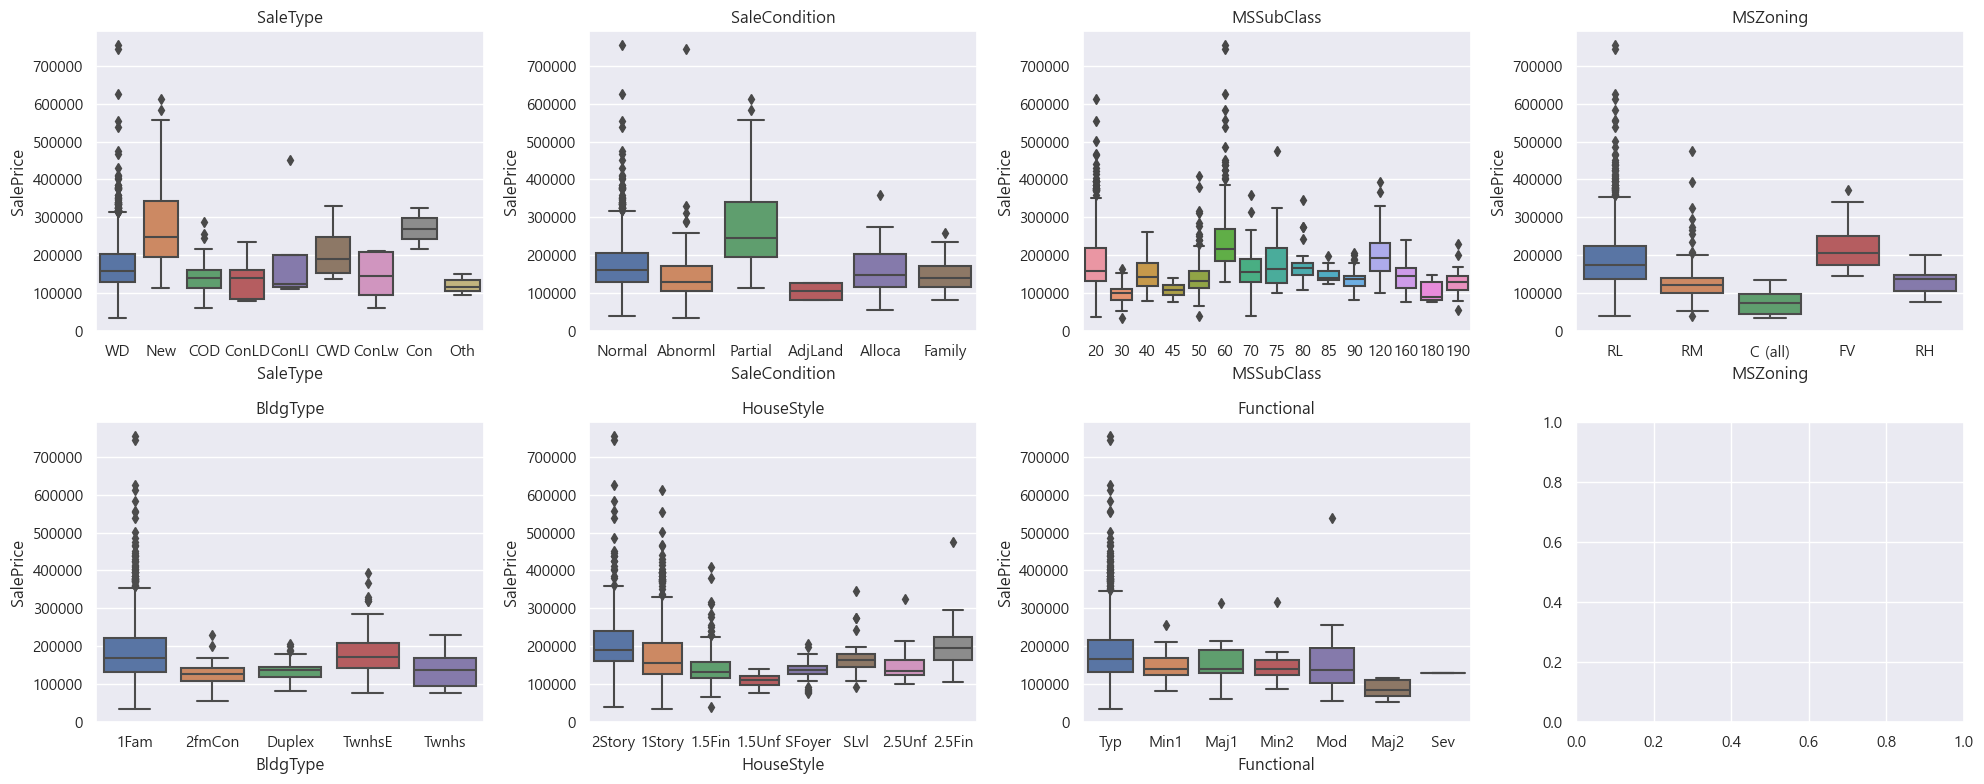

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)  ) 

col_list = ['SaleType','SaleCondition','MSSubClass','MSZoning','BldgType','HouseStyle','Functional']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[r][c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

# 'BldgType','HouseStyle','Functional' 삭제

## 날짜 관련 
  - ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

### 'YearBuilt','YearRemodAdd','MoSold','YrSold'

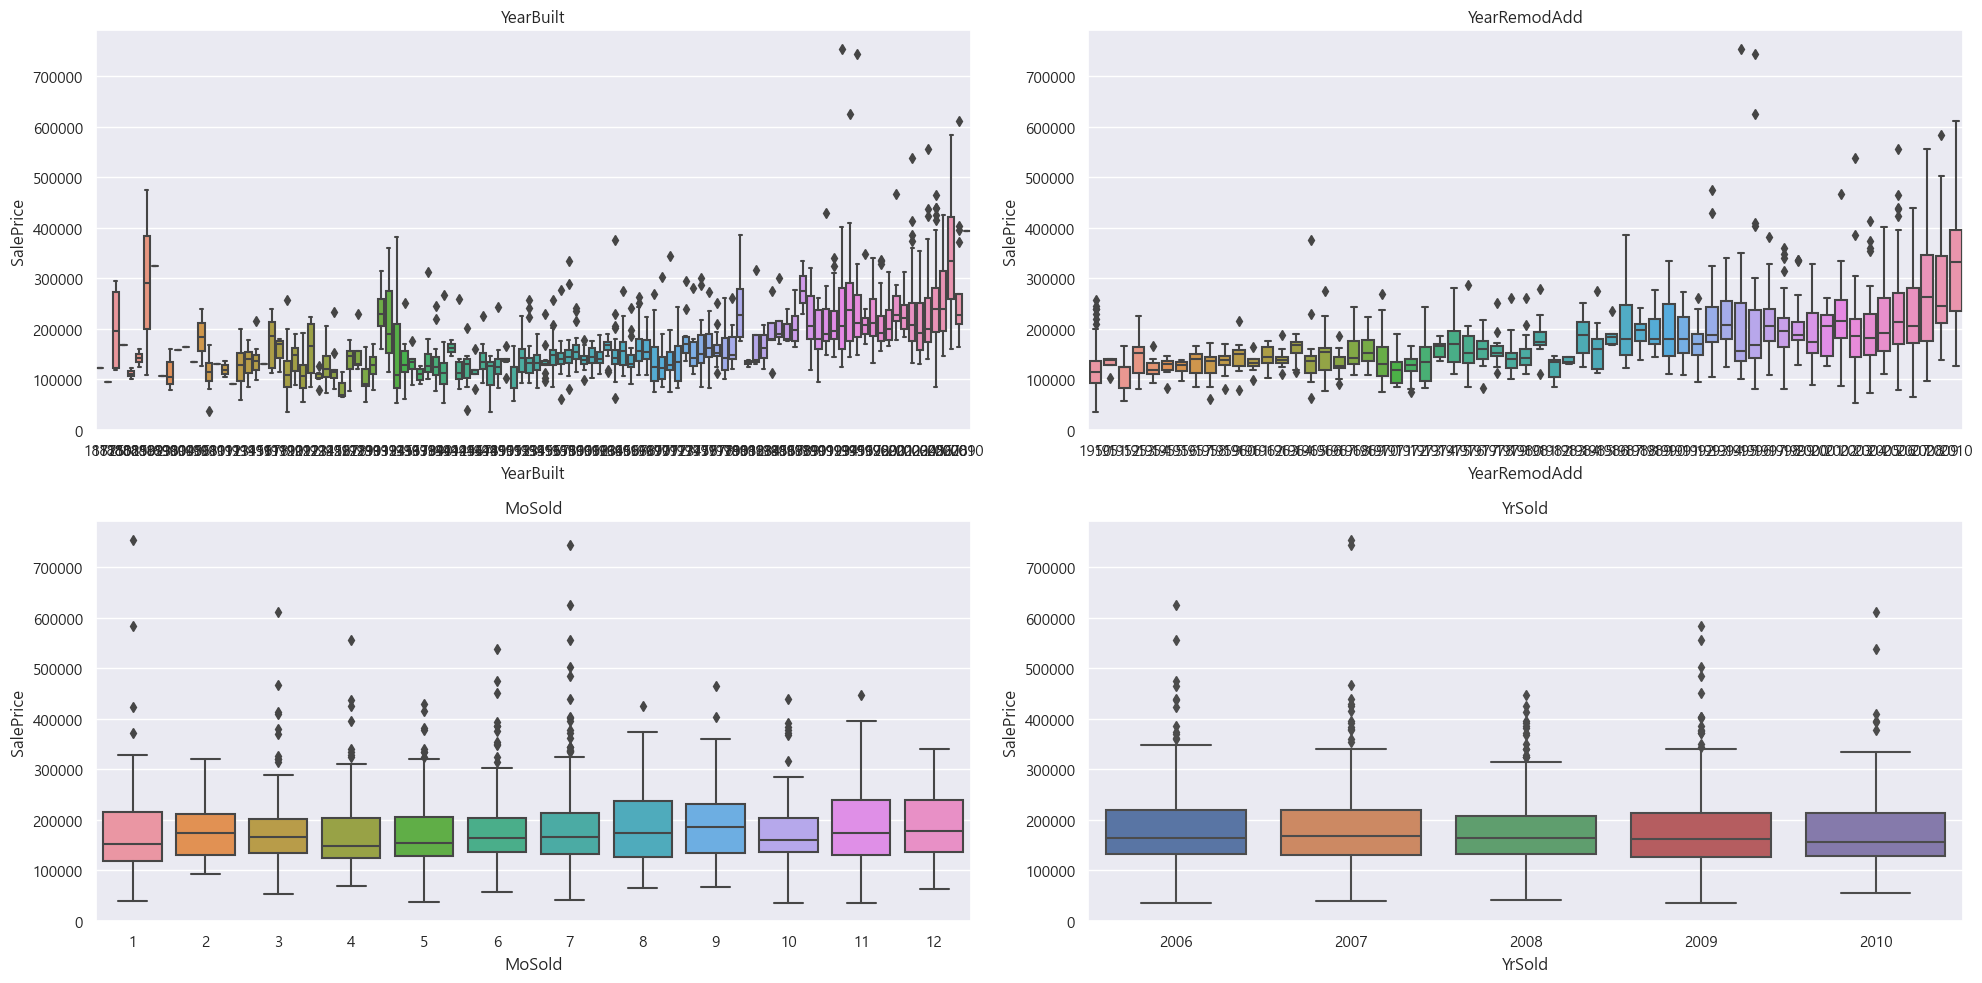

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10)  ) 

col_list = ['YearBuilt','YearRemodAdd','MoSold','YrSold']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[r][c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

# 'MoSold','YrSold' 삭제

## 지형 관련 피쳐

- LotConfig

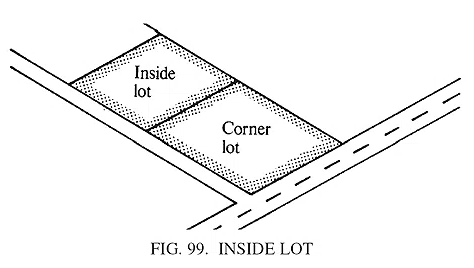

### Lot*

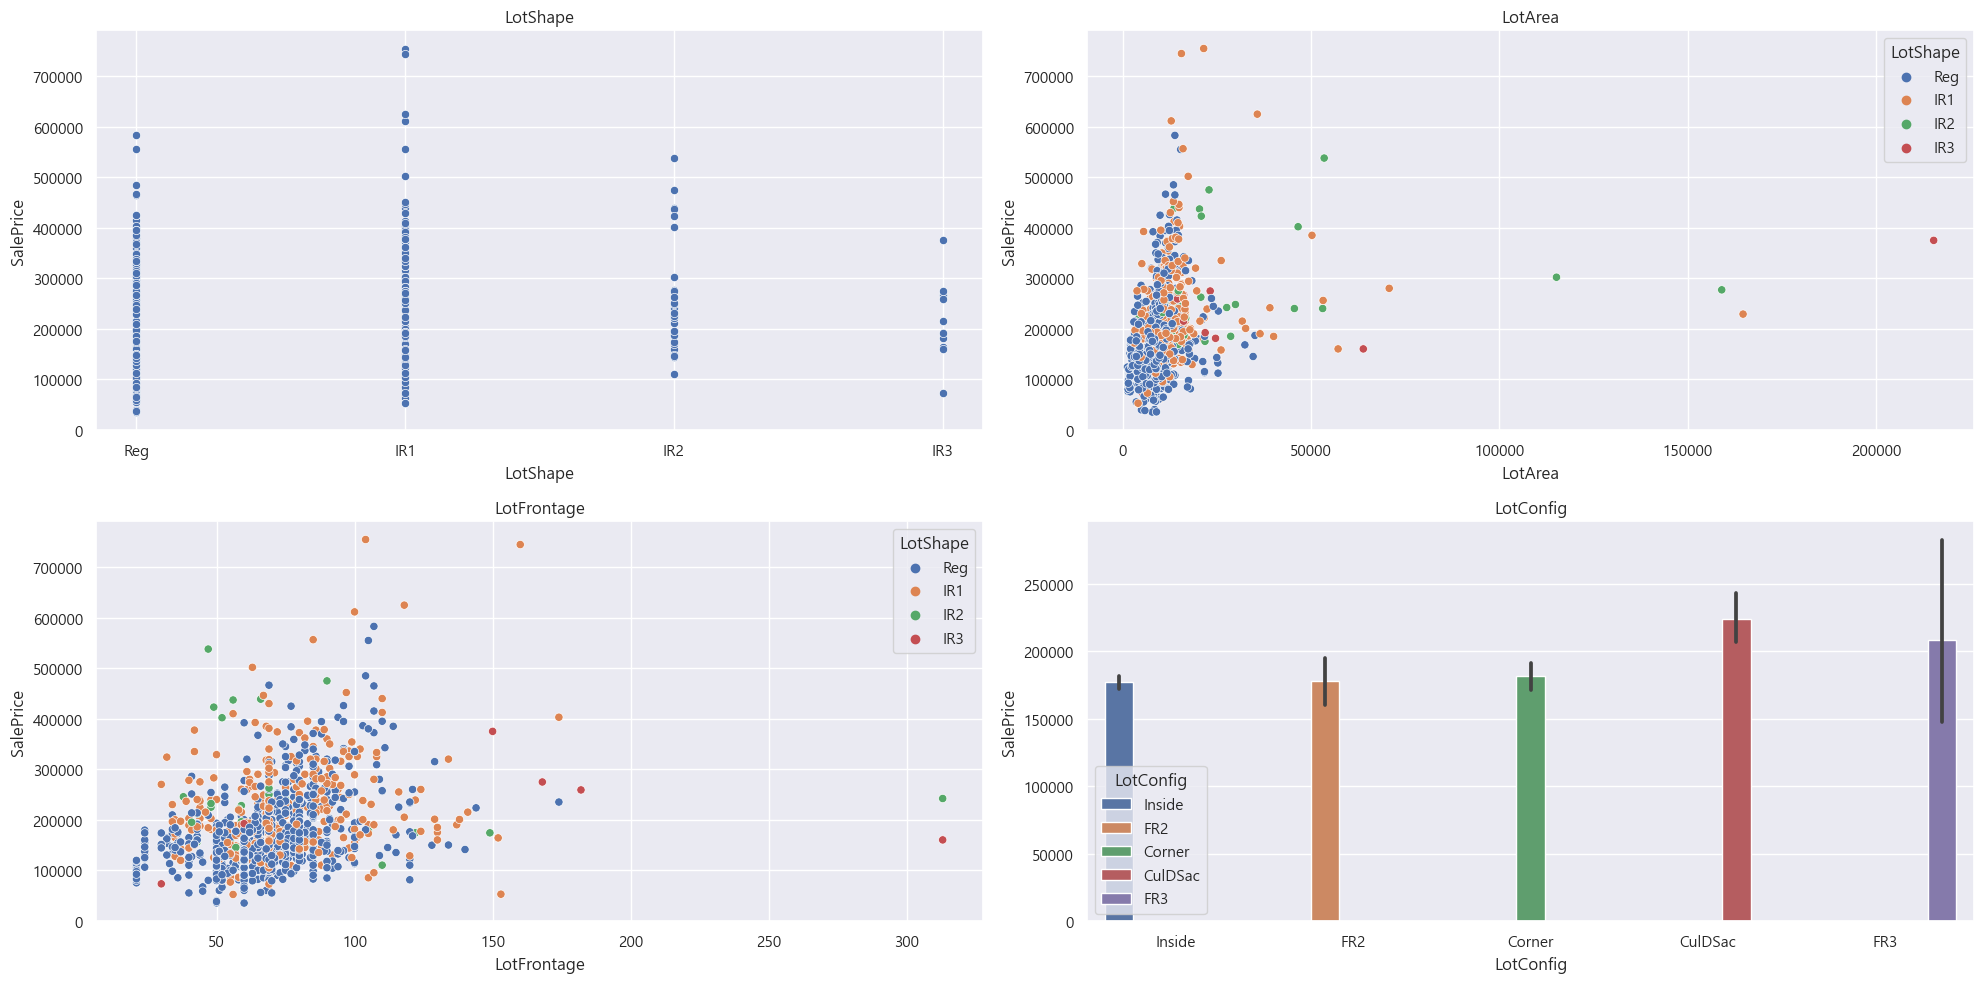

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10)  ) 
axes[0][0].set_title('LotShape')
sns.scatterplot(data=train, x='LotShape', y='SalePrice' ,ax=axes[0][0])

axes[0][1].set_title('LotArea')
sns.scatterplot(data=train, x='LotArea', y='SalePrice' ,hue='LotShape',ax=axes[0][1])

axes[1][0].set_title('LotFrontage')
sns.scatterplot(data=train, x='LotFrontage', y='SalePrice' ,hue='LotShape',ax=axes[1][0])

axes[1][1].set_title('LotConfig')
sns.barplot(data=train, x='LotConfig', y='SalePrice' ,hue='LotConfig',ax=axes[1][1])

plt.tight_layout()
plt.show()

### Land*

><b>LandContour</b> : Flatness of the property
- Lvl : Near Flat/Level
- Bnk : Banked - Quick and significant rise from street grade to building
- HLS : Hillside - Significant slope from side to side
- Low : Depression

><b>LandSlope</b> : Slope of property
- Gtl : Gentle slope
- Mod : Moderate Slope
- Sev : Severe Slope

- 고도 높음, 경사 평탄 : 비쌈
- 고도 낮음, 경사 가파름 : 쌈

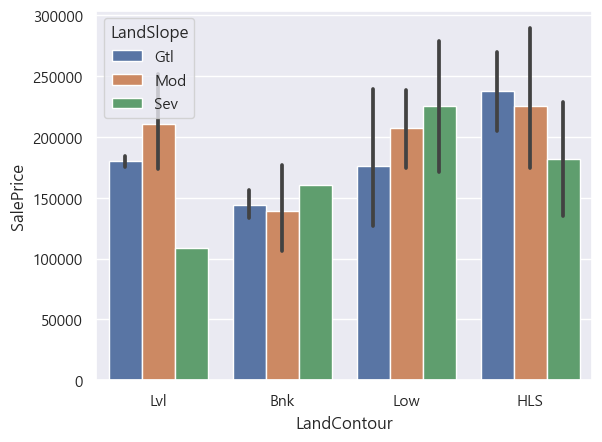

In [45]:
sns.barplot(data=train, x='LandContour', y='SalePrice', hue='LandSlope')
plt.show()

## 집 구조 관련 피쳐

In [46]:
# 'GrLivArea','1stFlrSF','2ndFlrSF','LotArea','LandSlope','LandContour'

### 1stFlrSF/2ndFlrSF

In [47]:
train['tot_FlrSF']=train['1stFlrSF']+train['2ndFlrSF']
train['tot_FlrSF']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: tot_FlrSF, Length: 1460, dtype: int64

In [48]:
test['tot_FlrSF']=test['1stFlrSF']+test['2ndFlrSF']
test['tot_FlrSF']

0        896
1       1329
2       1629
3       1604
4       1280
        ... 
1454    1092
1455    1092
1456    1224
1457     970
1458    2000
Name: tot_FlrSF, Length: 1459, dtype: int64

<AxesSubplot: title={'center': '2ndFlrSF'}, xlabel='2ndFlrSF', ylabel='SalePrice'>

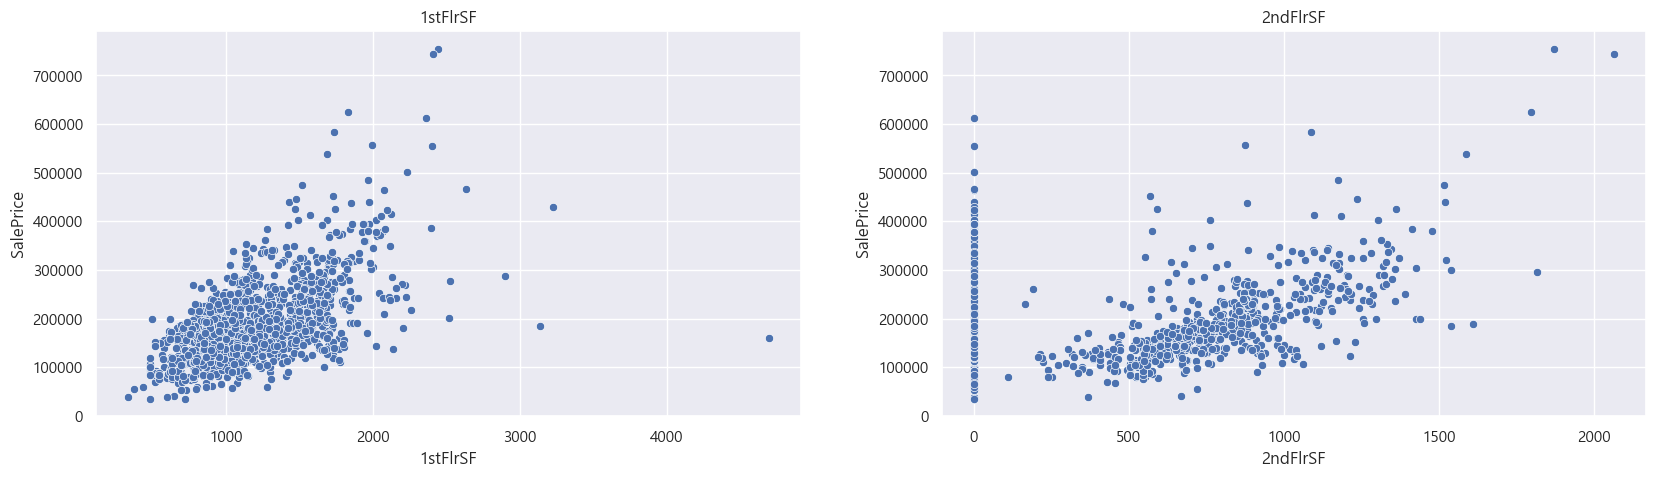

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)  ) 
axes[0].set_title('1stFlrSF')
sns.scatterplot(data=train, x='1stFlrSF', y='SalePrice' ,ax=axes[0])
axes[1].set_title('2ndFlrSF')
sns.scatterplot(data=train, x='2ndFlrSF', y='SalePrice' ,ax=axes[1])

- 2층 유무 피쳐 만들기

In [50]:
floor_df=train[['2ndFlrSF','1stFlrSF','GrLivArea','SalePrice']]
floor_df['floor_num']=np.where(floor_df['2ndFlrSF']==0,1,2)
train['floor_num']=np.where(train['2ndFlrSF']==0,1,2)
# floor_df['floor_area']=floor_df['1stFlrSF']+floor_df['2ndFlrSF']

In [51]:
# floor_df=floor_df.drop('floor_area',axis=1)

In [52]:
test['floor_num']=np.where(test['2ndFlrSF']==0,1,2)

- 단층 가격 > 2층
- 단층인경우 2층인 경우보다 1층의 면적이 넓음

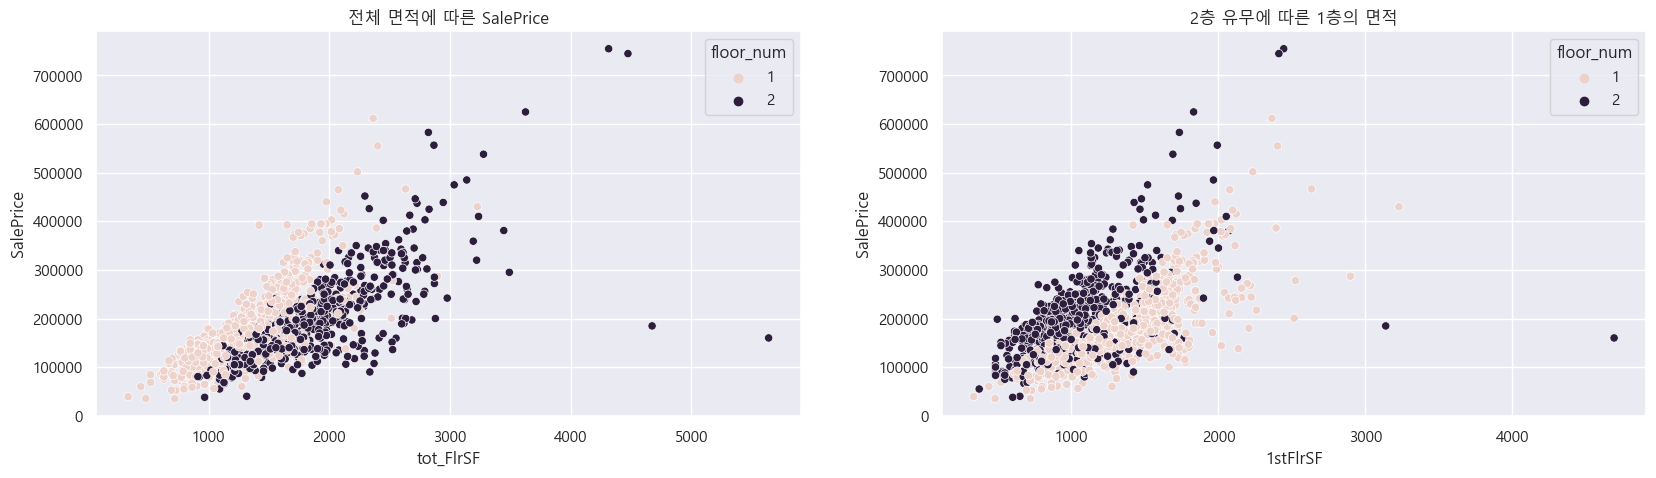

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)  ) 
axes[0].set_title('전체 면적에 따른 SalePrice')
sns.scatterplot(data=train, x='tot_FlrSF', y='SalePrice' ,hue='floor_num',ax=axes[0])

axes[1].set_title('2층 유무에 따른 1층의 면적')
sns.scatterplot(data=train, x='1stFlrSF', y='SalePrice',hue='floor_num',ax=axes[1])

plt.show()

In [54]:
train['floor_num'].value_counts()

1    829
2    631
Name: floor_num, dtype: int64

### floor_num, opt - SalePrice

In [55]:
# sns.countplot(data=floor_df, x='floor_num')

<AxesSubplot: xlabel='floor_num', ylabel='SalePrice'>

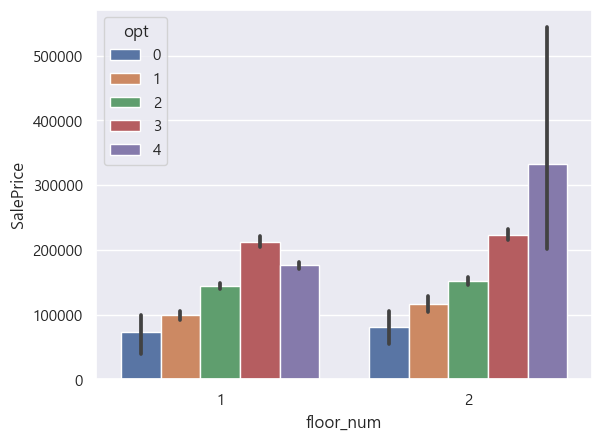

In [56]:
sns.barplot(data=train, x='floor_num', y='SalePrice',hue='opt')

In [57]:
train['SalePrice'][(train['opt']==3)&(floor_df['floor_num']==1)]

1       181500
6       307000
9       118000
13      279500
14      157000
         ...  
1437    394617
1441    149300
1443    121000
1451    287090
1456    210000
Name: SalePrice, Length: 376, dtype: int64

In [58]:
train['SalePrice'][(train['opt']==4)&(floor_df['floor_num']==1)]

810     181000
1170    171000
Name: SalePrice, dtype: int64

In [59]:
train['SalePrice'][(train['opt']==4)&(floor_df['floor_num']==2)]

197     235000
1182    745000
1298    160000
1386    250000
1423    274970
Name: SalePrice, dtype: int64

## 내부시설(구조물갯수,난방)

### Utilities

In [60]:
# ['TotRmsAbvGrd','Bedroom','FullBath','HalfBath','Kitchen','Utilities','Heating','HeatingQC','Fireplaces','CentralAir','Electrical']

- AllPub : All public Utilities (E,G,W,& S)
- NoSewr : Electricity, Gas, and Water (Septic Tank)
- NoSeWa : Electricity and Gas Only
- ELO    : Electricity only

In [61]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

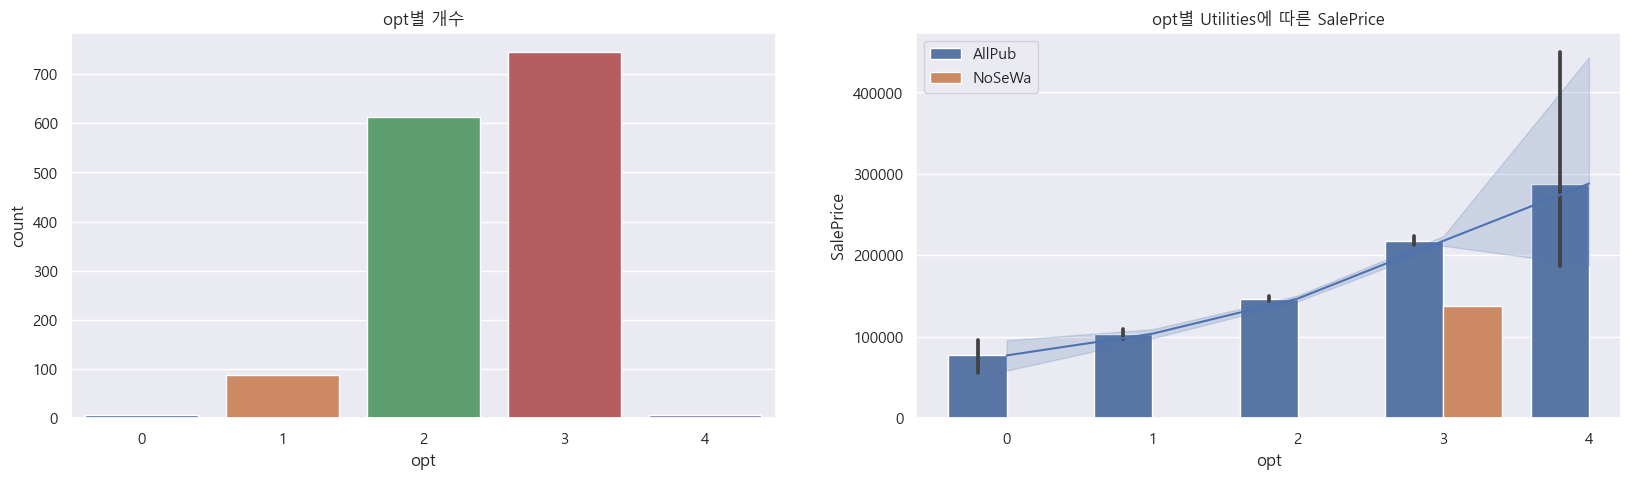

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)  ) 
axes[0].set_title('opt별 개수')
sns.countplot(data=train, x='opt',ax=axes[0])

axes[1].set_title('opt별 Utilities에 따른 SalePrice')
sns.barplot(data=train, x=train['opt'], y='SalePrice', hue='Utilities',ax=axes[1])
sns.lineplot(data=train, x='opt', y='SalePrice',ax=axes[1])

plt.show()

### HalfBath, FullBath  --> tot_Bath

In [63]:
train['HalfBath'].value_counts().sort_index()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [64]:
train['FullBath'].value_counts().sort_index()

0      9
1    650
2    768
3     33
Name: FullBath, dtype: int64

In [65]:
train['tot_Bath']=train['FullBath']+(train['HalfBath']/2)

In [66]:
test['tot_Bath']=test['FullBath']+(test['HalfBath']/2)

In [67]:
train['tot_Bath']

0       2.5
1       2.0
2       2.5
3       1.0
4       2.5
       ... 
1455    2.5
1456    2.0
1457    2.0
1458    1.0
1459    1.5
Name: tot_Bath, Length: 1460, dtype: float64

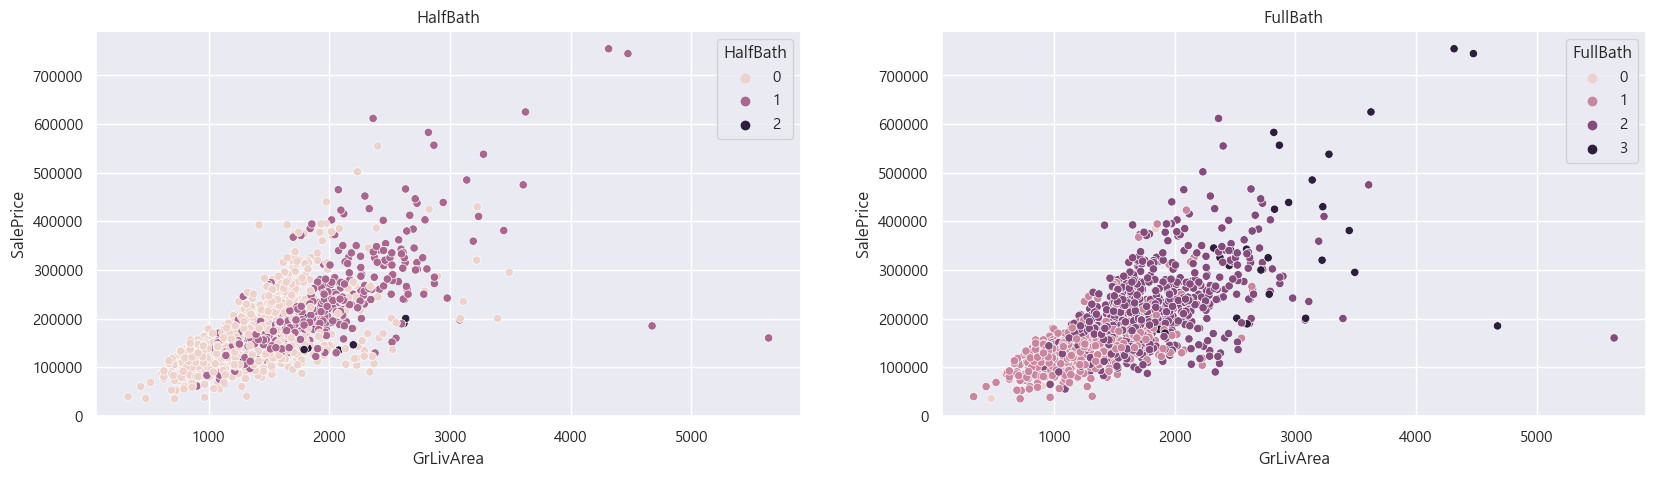

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)  ) 
axes[0].set_title('HalfBath')
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice',hue='HalfBath',ax=axes[0])

axes[1].set_title('FullBath')
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice',hue='FullBath',ax=axes[1])
plt.show()

# axes[2].set_title('tot_Bath')
# sns.barplot(data=train, x='tot_Bath', y='SalePrice',ax=axes[2])
# plt.show()

In [69]:
train['tot_Bath'].value_counts().sort_index()

0.0      3
0.5      3
1.0    469
1.5    180
2.0    433
2.5    334
3.0     20
3.5     18
Name: tot_Bath, dtype: int64

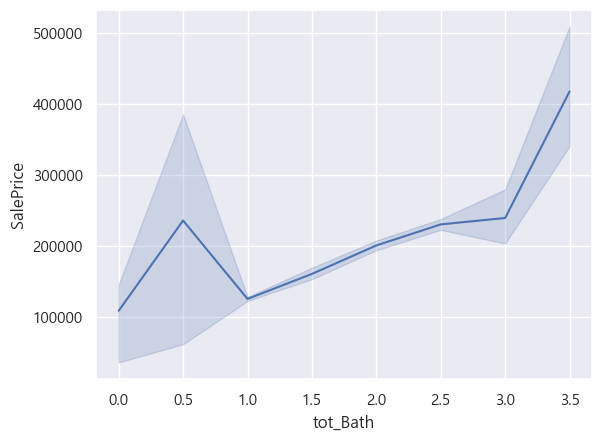

In [70]:
sns.lineplot(data=train, x='tot_Bath', y='SalePrice')
plt.show()

### 'TotRmsAbvGrd','BedroomAbvGr','KitchenAbvGr', 'KitchenQual','Heating','HeatingQC','CentralAir','Electrical'

In [71]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

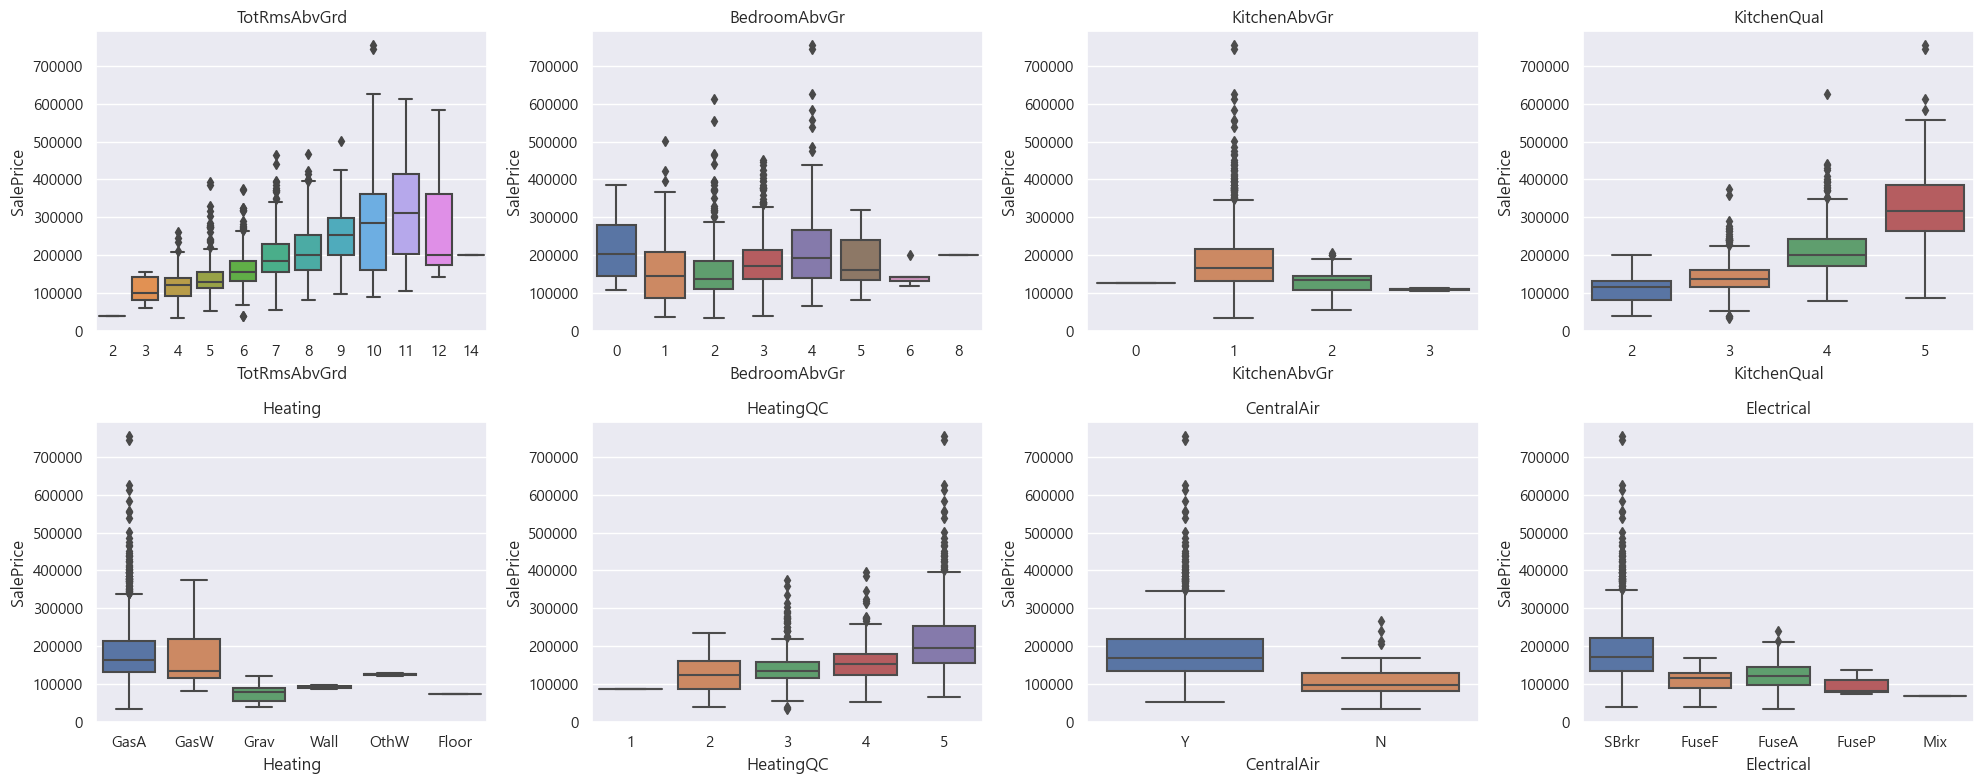

In [72]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)  ) 

col_list = ['TotRmsAbvGrd','BedroomAbvGr','KitchenAbvGr', 'KitchenQual','Heating','HeatingQC','CentralAir','Electrical']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[r][c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()


# 'Heating','HeatingQC','CentralAir','Electrical','KitchenAbvGr' 삭제

##  외장재
- Exterior1st : 주택 외부 피복재
- Exterior2nd : 주택 외부 피복재(재료가 둘 이상인 경우)
- MasVnrType : 석조 베니어 유형
- MasVnrArea : 벽돌 베니어 영역(제곱피트)
- ExterQual : 외장재 품질
- ExterCond : 외부 자재의 현재 상태

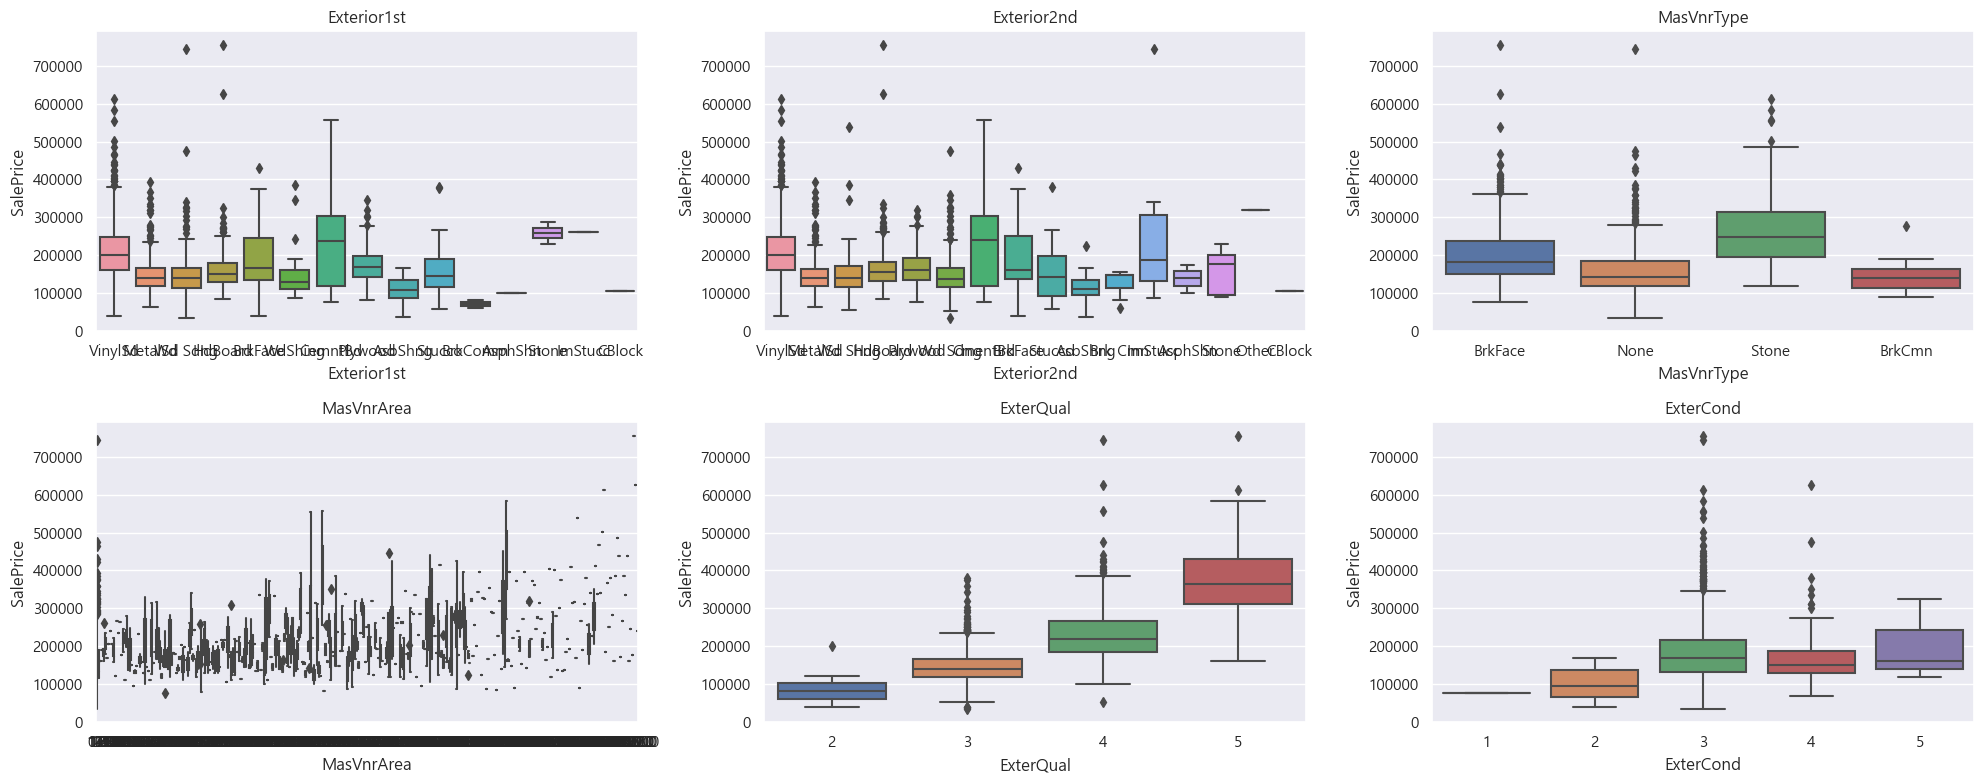

In [73]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8)  ) 

col_list = ['Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//3
    c = i%3
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[r][c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

# 'MasVnrType','MasVnrArea' ,'ExterCond' 삭제

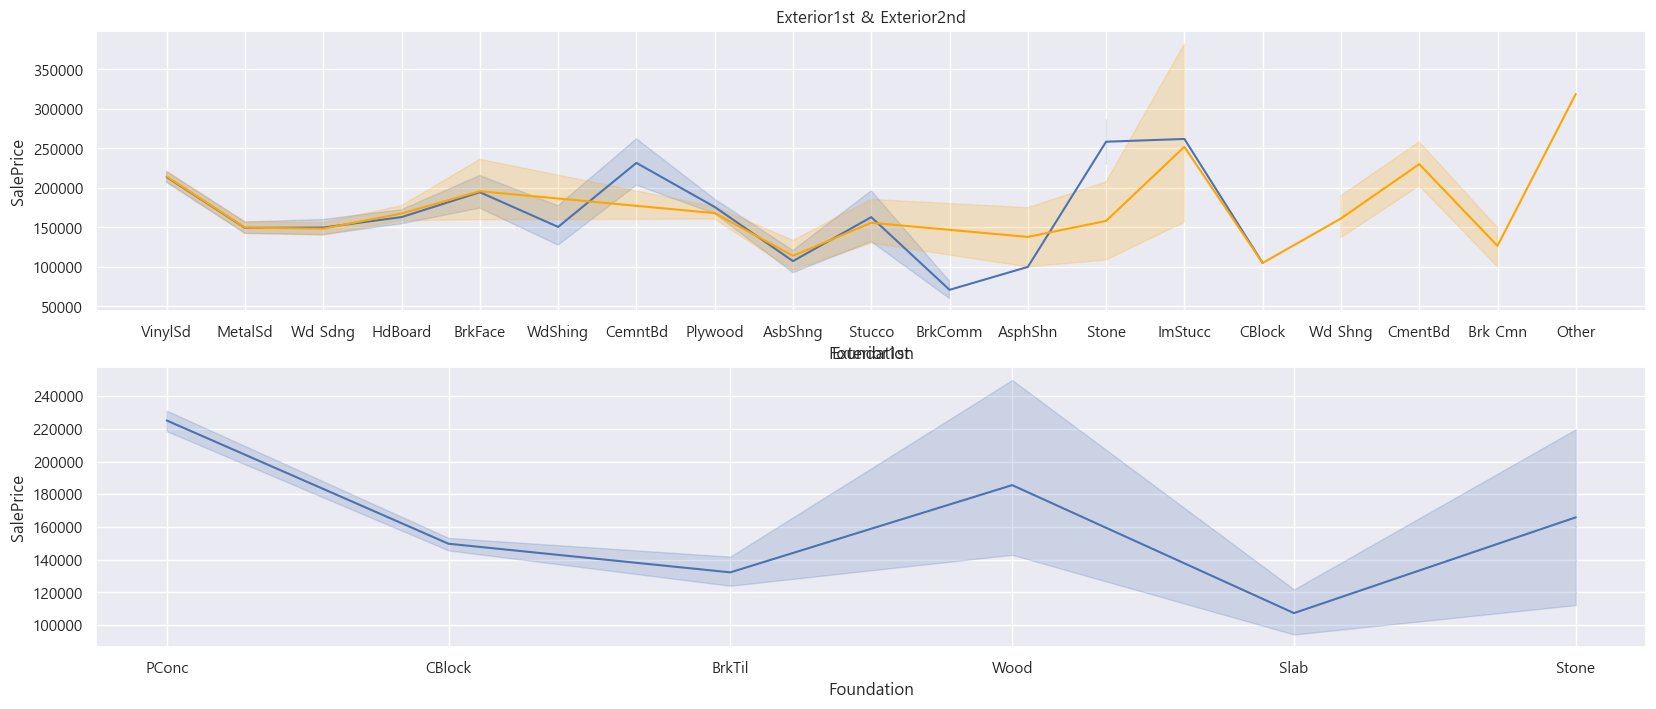

In [74]:
fig, axes = plt.subplots(2, 1, figsize=(20, 8)  ) 

axes[0].set_title('Exterior1st & Exterior2nd')
sns.lineplot(data=train, x='Exterior1st', y='SalePrice',ax=axes[0])
sns.lineplot(data=train, x='Exterior2nd', y='SalePrice',ax=axes[0],color='orange')

axes[1].set_title('Foundation')
sns.lineplot(data=train, x='Foundation', y='SalePrice',ax=axes[1])

plt.show()

## 외부시설

### 'LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'

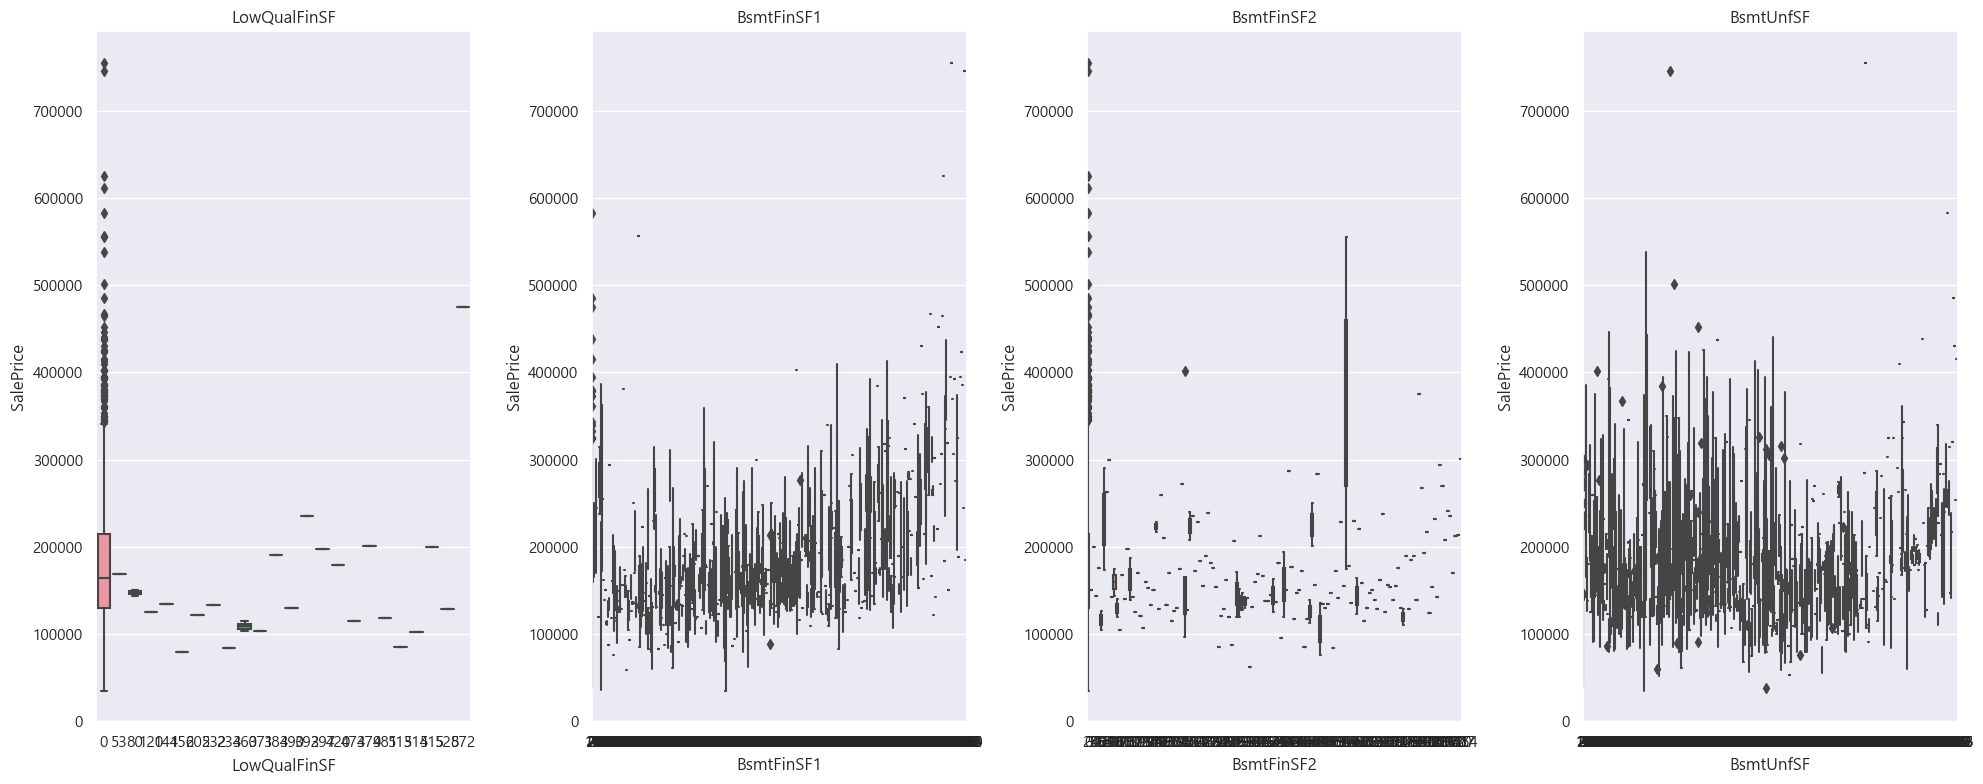

In [75]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8)  ) 

col_list = ['LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

# 'LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF' 삭제

### BsmtFullBath, BsmtHalfBath  --> tot_BsmtBath

In [76]:
train[['BsmtHalfBath','BsmtFullBath']].isna().sum()

BsmtHalfBath    0
BsmtFullBath    0
dtype: int64

In [77]:
train['tot_BsmtBath']=train['BsmtFullBath']+(train['BsmtHalfBath']/2)
train['tot_BsmtBath'].value_counts().sort_index()

0.0    783
0.5     71
1.0    581
1.5      9
2.0     15
3.0      1
Name: tot_BsmtBath, dtype: int64

In [78]:
test['tot_BsmtBath']=test['BsmtFullBath']+(test['BsmtHalfBath']/2)

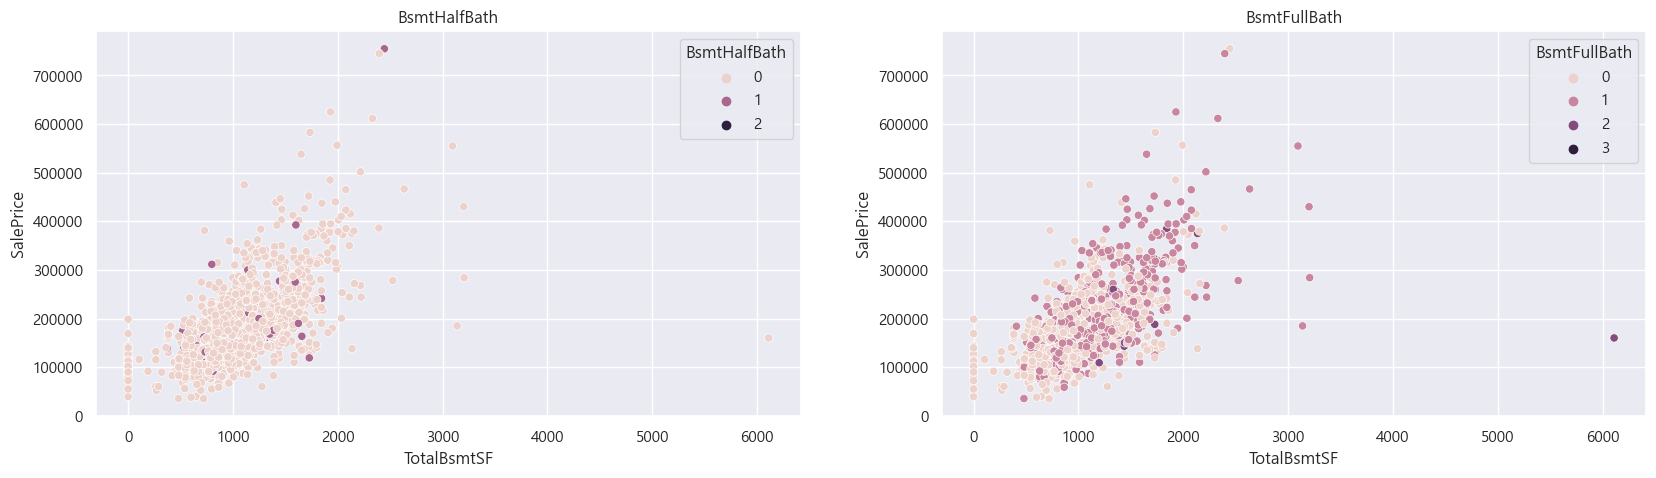

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)  ) 
axes[0].set_title('BsmtHalfBath')
sns.scatterplot(data=train, x='TotalBsmtSF', y='SalePrice',hue='BsmtHalfBath',ax=axes[0])

axes[1].set_title('BsmtFullBath')
sns.scatterplot(data=train, x='TotalBsmtSF', y='SalePrice',hue='BsmtFullBath',ax=axes[1])
plt.show()


# axes[2].set_title('tot_BsmtBath')
# sns.lineplot(data=train, x='tot_BsmtBath', y='SalePrice',ax=axes[2])

# plt.show()

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

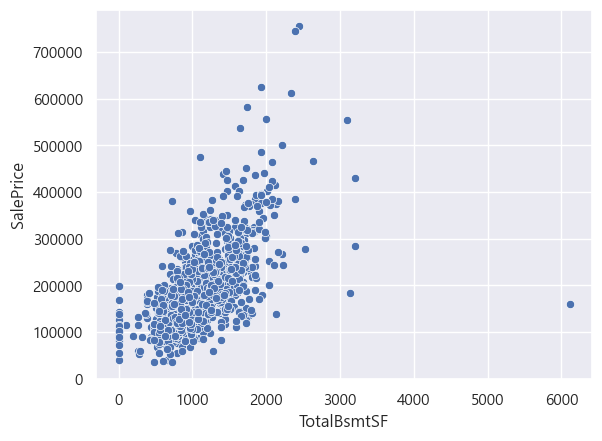

In [80]:
sns.scatterplot(data=train, x='TotalBsmtSF', y='SalePrice')

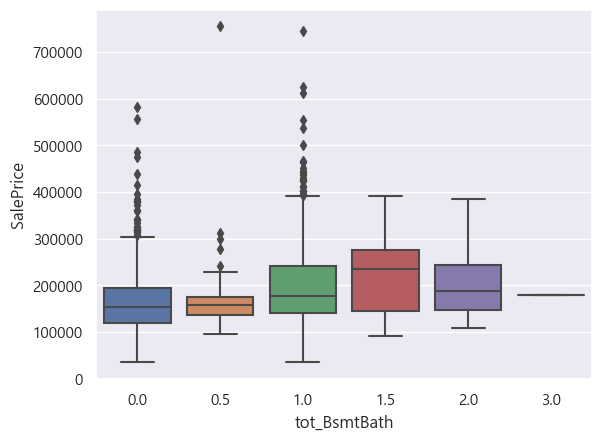

In [81]:
sns.boxplot(data=train, x='tot_BsmtBath', y='SalePrice')
plt.show()

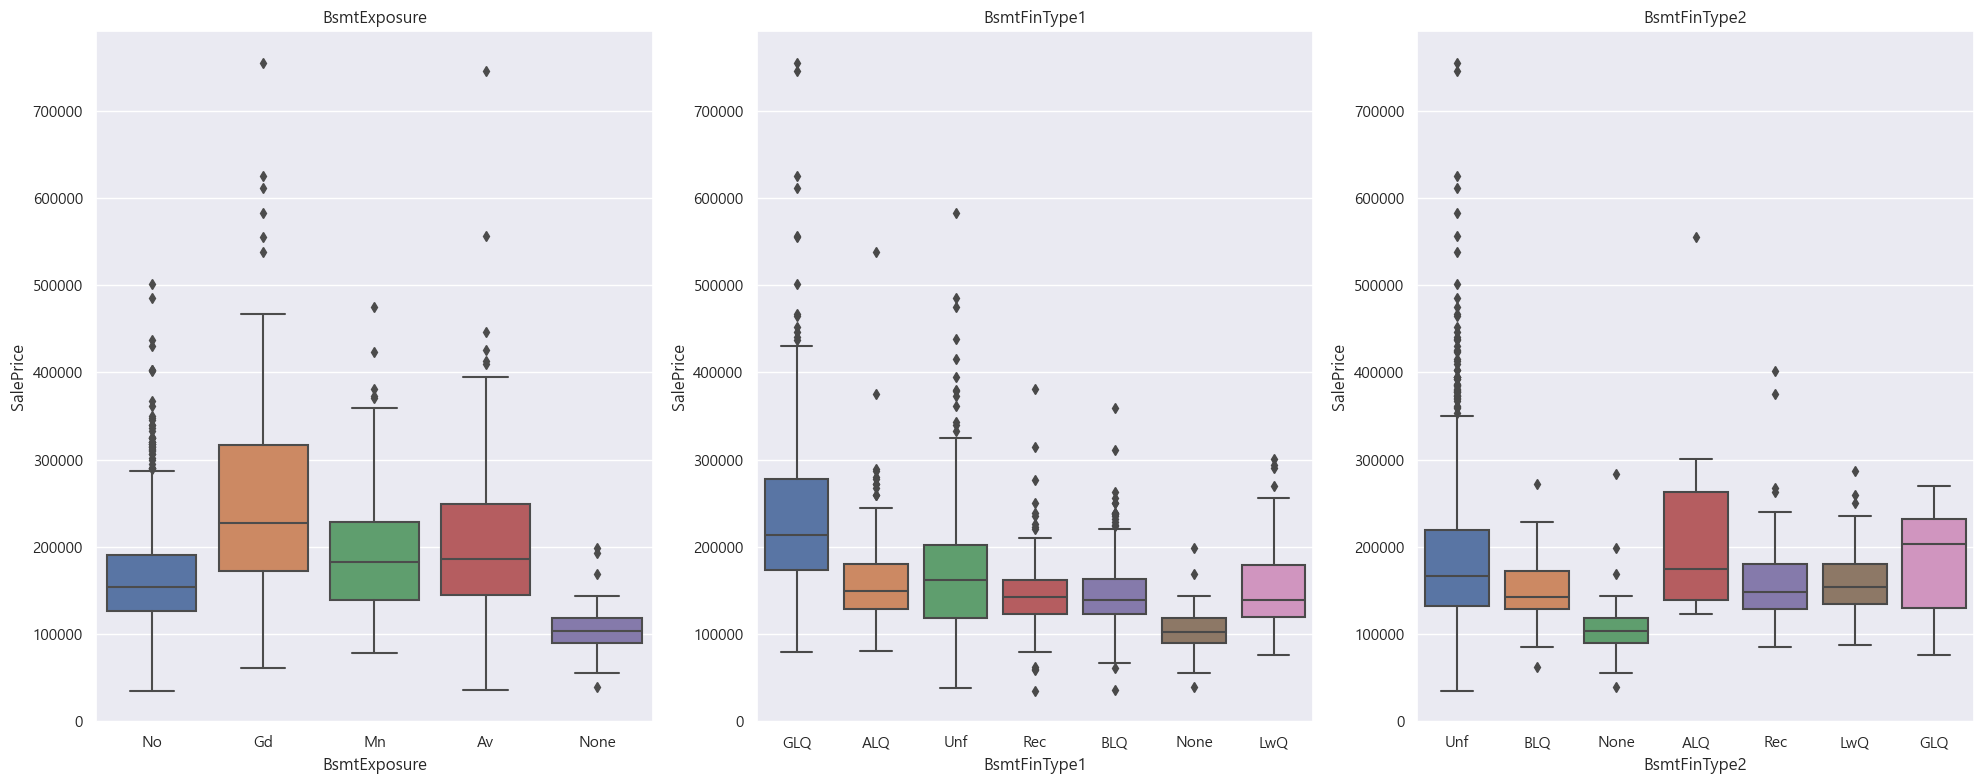

In [82]:

fig, axes = plt.subplots(1, 3, figsize=(20, 8)  ) 

col_list = ['BsmtExposure', 'BsmtFinType1',  'BsmtFinType2']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//3
    c = i%3
    #print(i,r, c ,col)
    axes[c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

# 'BsmtFinType1',  'BsmtFinType2' 삭제

### 'PoolArea','PoolQC','MiscVal','MiscFeature'

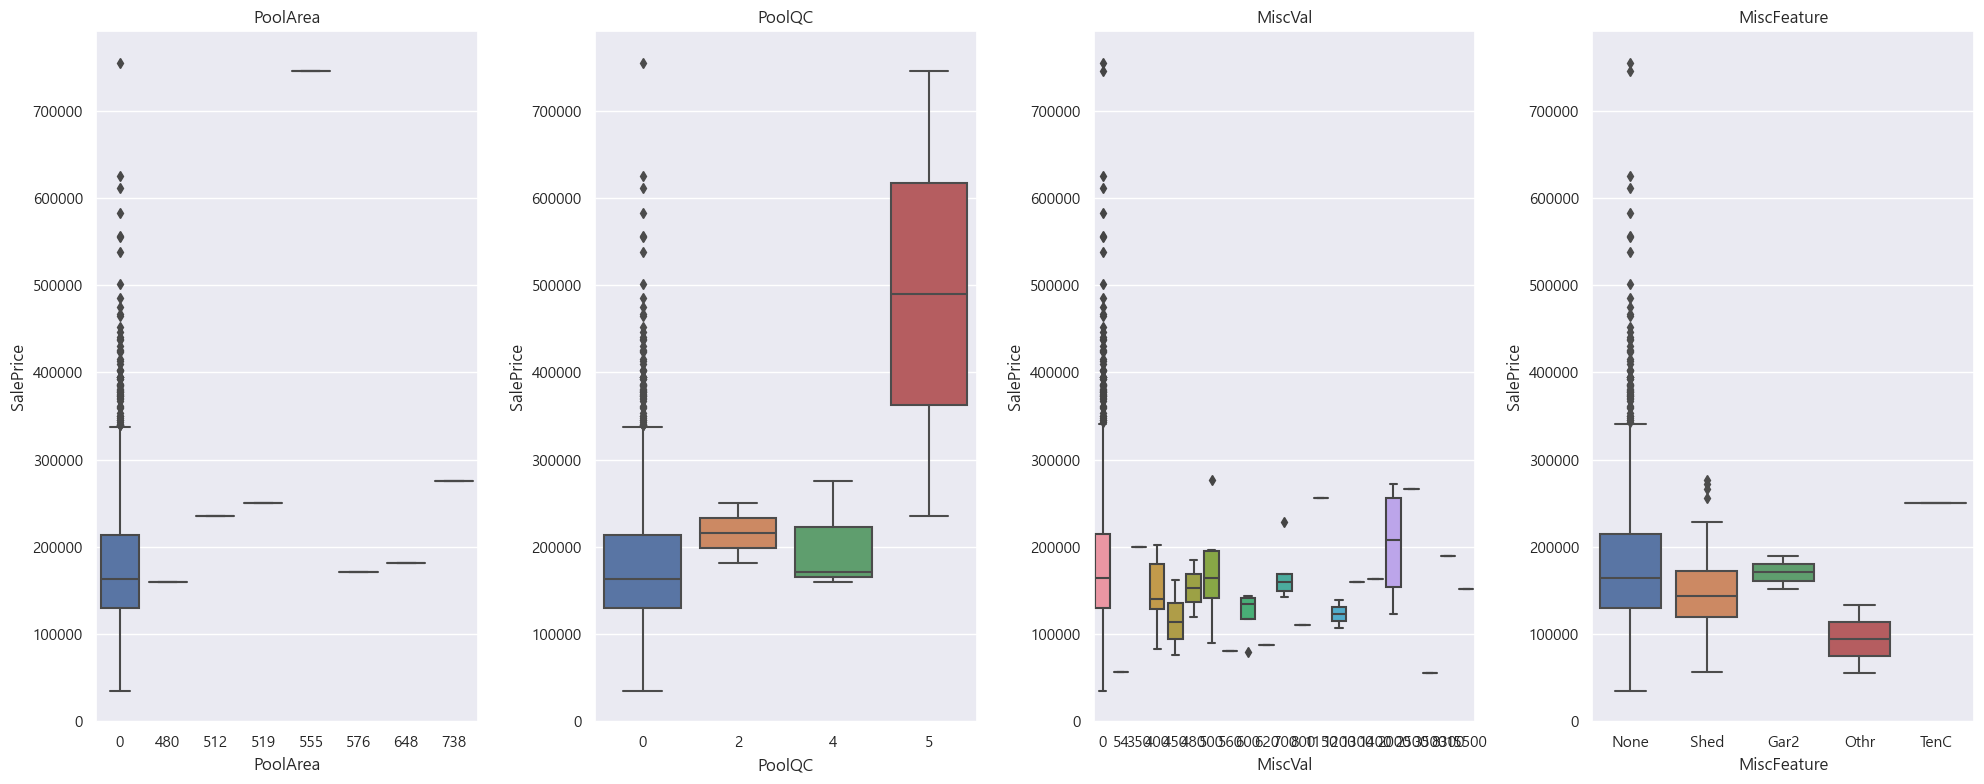

In [83]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8)  ) 

col_list = ['PoolArea','PoolQC','MiscVal','MiscFeature']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()


### garage

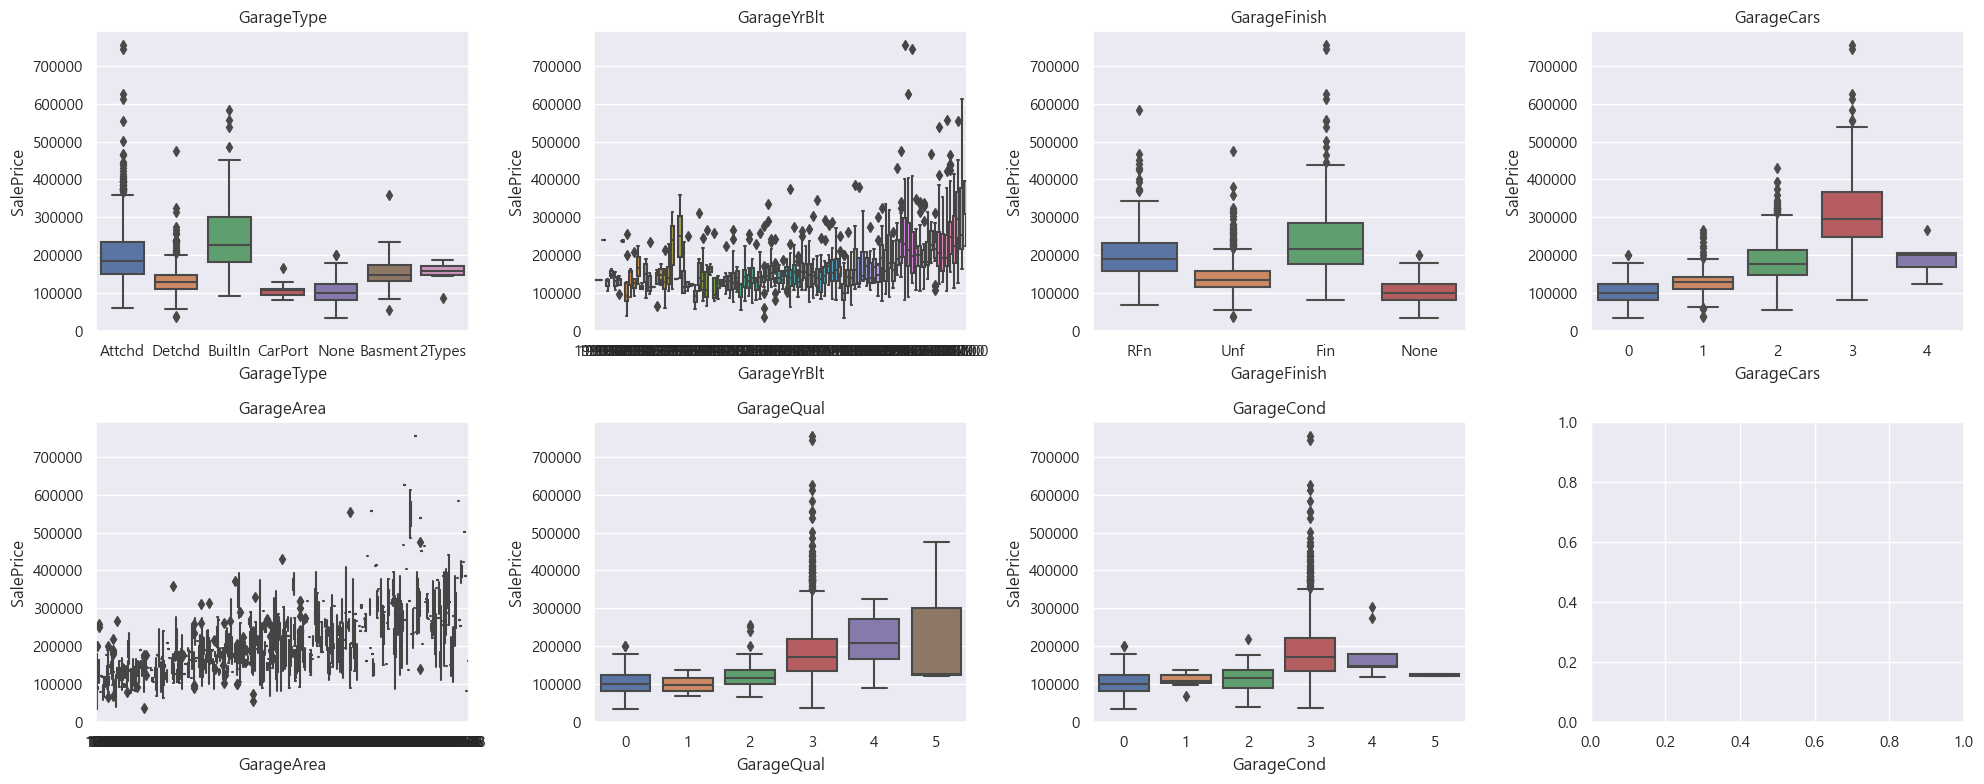

In [84]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)  ) 

col_list = ['GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[r][c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

# 'GarageQual','GarageCars','GarageCond' 삭제

<AxesSubplot: xlabel='GarageArea', ylabel='SalePrice'>

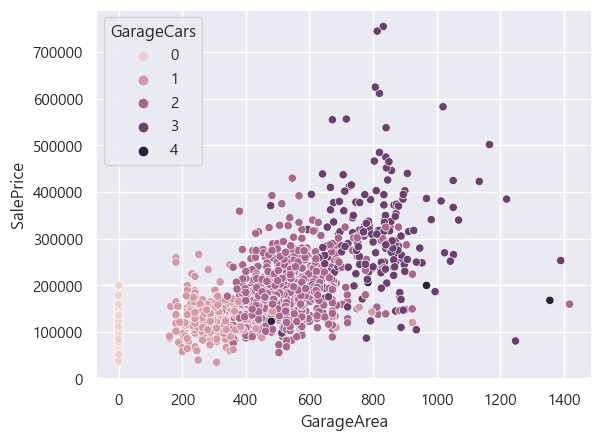

In [85]:
sns.scatterplot(data=train, x='GarageArea', y='SalePrice' ,hue='GarageCars')

In [86]:
train['GarageCars'].value_counts().sort_index()

0     81
1    369
2    824
3    181
4      5
Name: GarageCars, dtype: int64

<AxesSubplot: xlabel='GarageYrBlt', ylabel='SalePrice'>

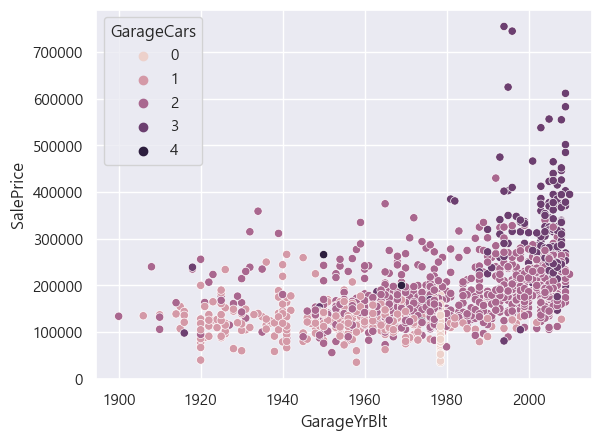

In [87]:
sns.scatterplot(data=train, x='GarageYrBlt', y='SalePrice' ,hue='GarageCars')

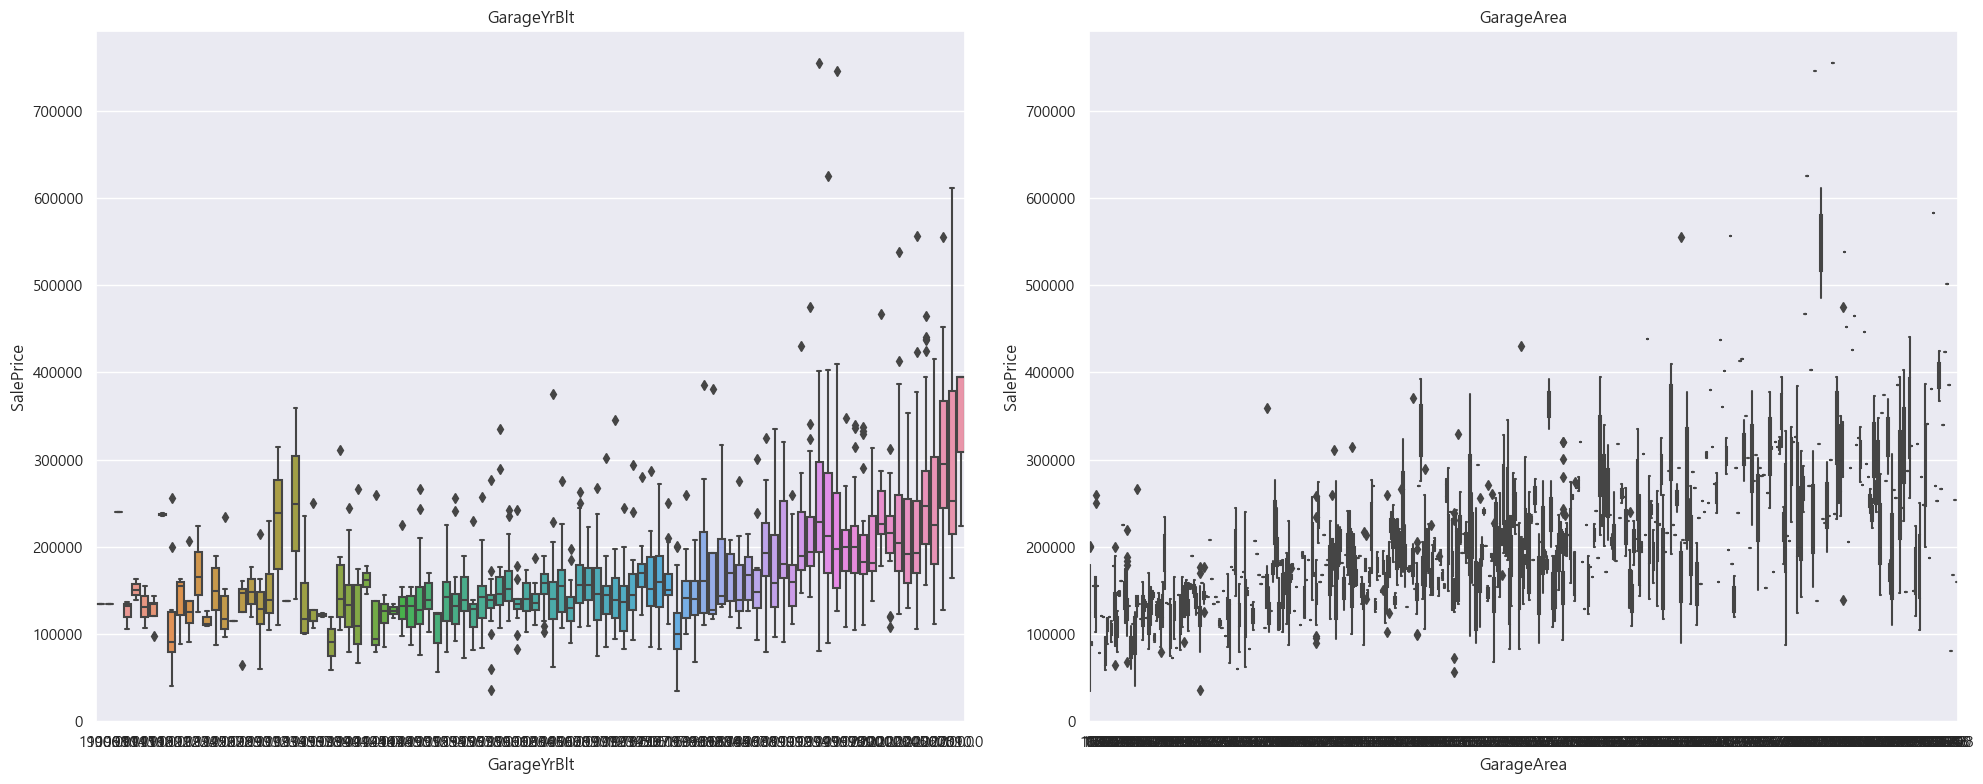

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8)  ) 

col_list = ['GarageYrBlt','GarageArea']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

### 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence',

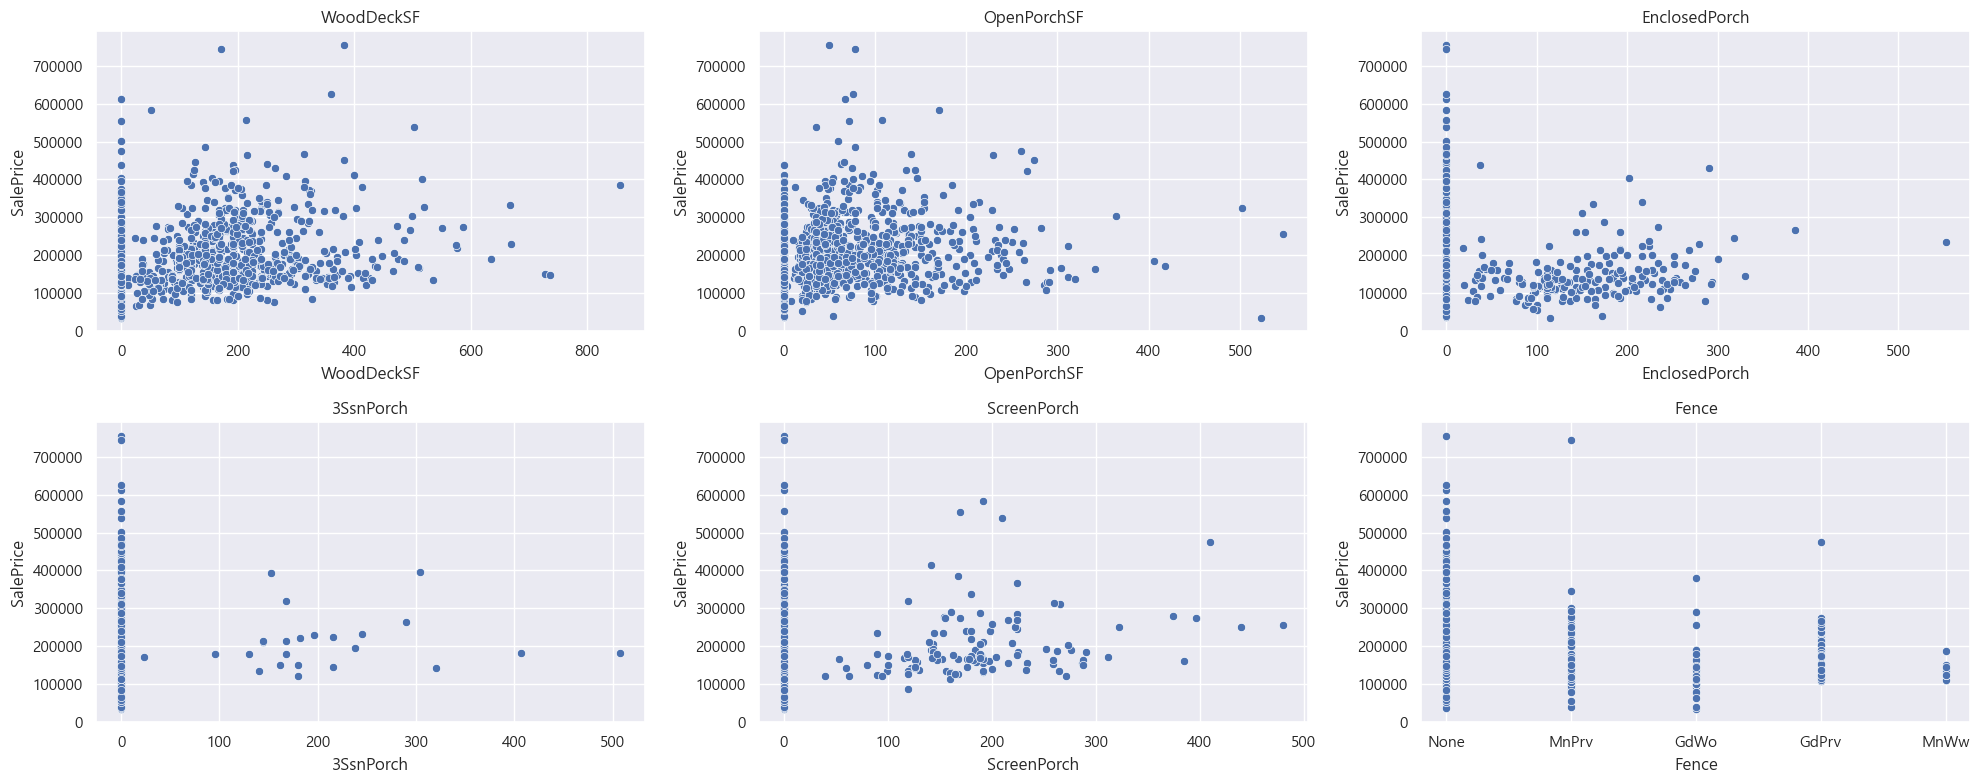

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8)  ) 

col_list = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//3
    c = i%3
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    # sns.regplot(data=train, x=col, y='SalePrice',scatter_kws={'alpha':0.2} ,ax=axes[r][c])
    sns.scatterplot(data=train, x=col, y='SalePrice' ,ax=axes[r][c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

# 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence' 삭제

In [90]:
train[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]

OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
0              61              0          0            0
1               0              0          0            0
2              42              0          0            0
3              35            272          0            0
4              84              0          0            0
...           ...            ...        ...          ...
1455           40              0          0            0
1456            0              0          0            0
1457           60              0          0            0
1458            0            112          0            0
1459           68              0          0            0

[1460 rows x 4 columns]

In [91]:
train['tot_PorchSF']=train['OpenPorchSF']+train['EnclosedPorch']+train['3SsnPorch']+train['ScreenPorch']

In [92]:
test['tot_PorchSF']=test['OpenPorchSF']+test['EnclosedPorch']+test['3SsnPorch']+test['ScreenPorch']

In [93]:
train['Porch_y_n']=np.where(train['tot_PorchSF']==0,0,1)

In [94]:
test['Porch_y_n']=np.where(test['tot_PorchSF']==0,0,1)

In [95]:
train[['tot_PorchSF','Porch_y_n']].head()

tot_PorchSF  Porch_y_n
0           61          1
1            0          0
2           42          1
3          307          1
4           84          1

<AxesSubplot: xlabel='tot_PorchSF', ylabel='SalePrice'>

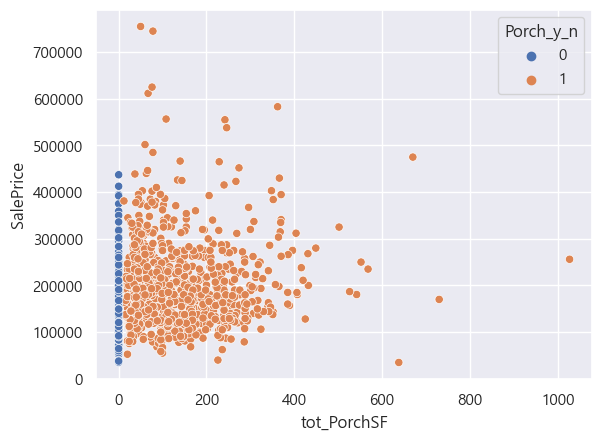

In [96]:
sns.scatterplot(data=train, x='tot_PorchSF', y='SalePrice',hue='Porch_y_n')

<AxesSubplot: >

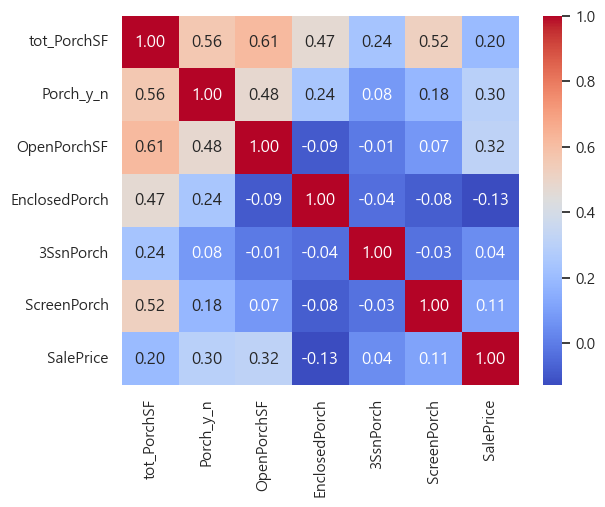

In [97]:
sns.heatmap(train[['tot_PorchSF','Porch_y_n','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','SalePrice']].corr(), fmt=".2f", annot=True, cmap='coolwarm')

##  도로 
  - 포장 : Street, PavedDrive, Alley      
  - 접근성 : Condition1, Condition2, Neighborhood

###  Street, PavedDrive

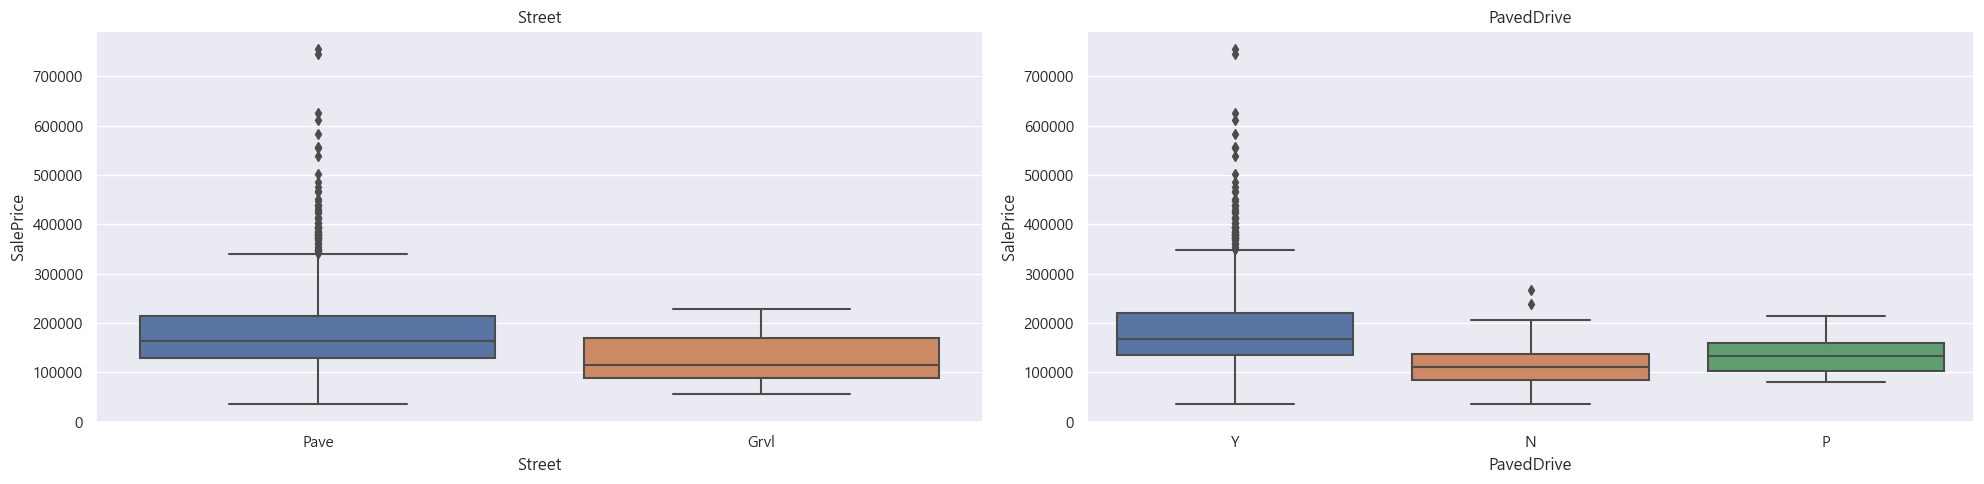

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)  ) 

col_list = ['Street', 'PavedDrive']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

# 'Street', 'PavedDrive' 삭제

### Condition1, Condition2, Neighborhood

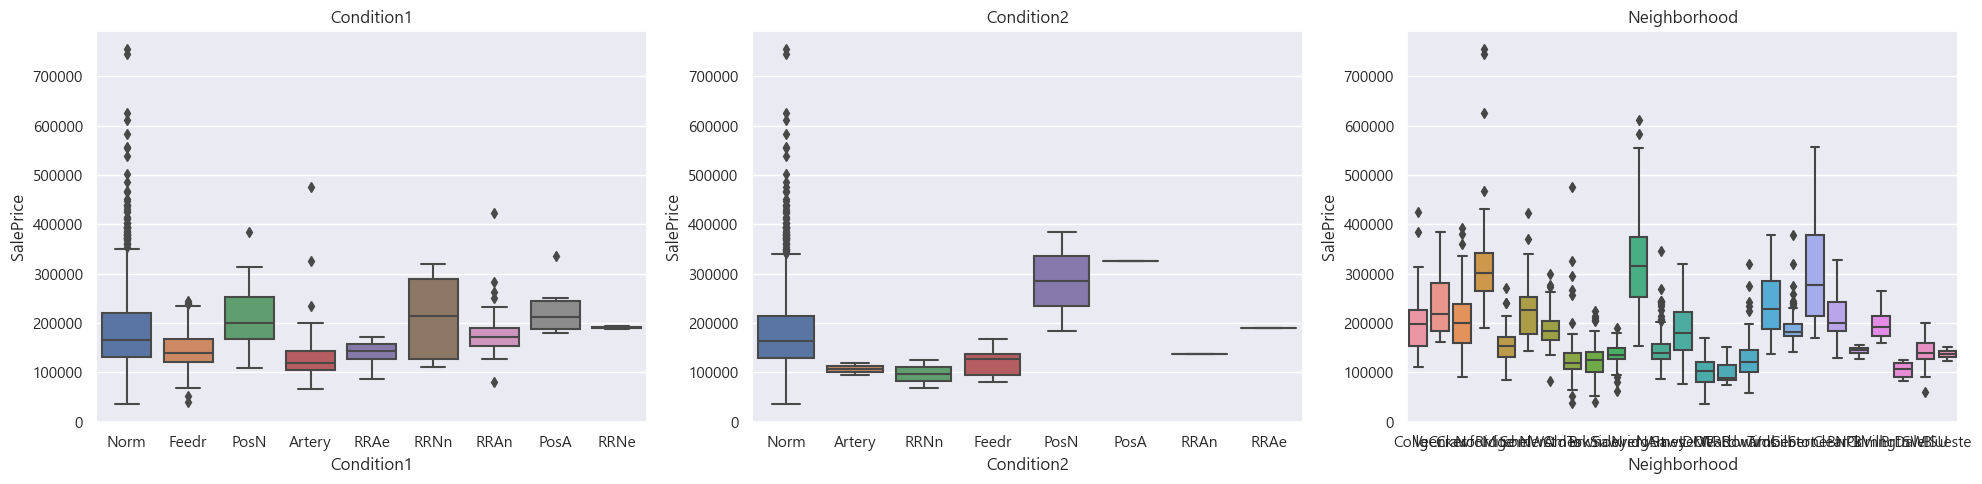

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5)  ) 

col_list = ['Condition1', 'Condition2', 'Neighborhood']

for i, col in enumerate(col_list) :  #train.columns) :
    r = i//3
    c = i%3
    #print(i,r, c ,col)
    axes[c].set_title(col)
    sns.boxplot(data=train, x=col, y='SalePrice' ,ax=axes[c])
    # sns.histplot(data=test, x=col, ax=axes[c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )

plt.tight_layout()
plt.show()

# get_dummies

In [419]:
train_s1=train[['MSSubClass', 'MSZoning',  
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2',
       'OverallQual',  'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd',
       'ExterQual',  'Foundation', 
       'TotalBsmtSF','1stFlrSF',
       'GrLivArea', 
       'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageType', 'GarageYrBlt', 'GarageArea',       
       'SalePrice',
       'tot_BsmtBath','tot_Bath',
       'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n', 'opt']].copy()
test_s1=test[['MSSubClass', 'MSZoning',  
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2',
       'OverallQual',  'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd',
       'ExterQual',  'Foundation', 
       'TotalBsmtSF','1stFlrSF',
       'GrLivArea', 
       'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageType', 'GarageYrBlt', 'GarageArea',
       'tot_BsmtBath','tot_Bath',
       'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n', 'opt']].copy()

In [420]:
lentrain = train_s1.shape[0]
col_list = ['MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'Exterior1st','Exterior2nd', 'Foundation', 'GarageType']
scaler_col=['MSSubClass', 'OverallQual', 'YearBuilt', 'YearRemodAdd','ExterQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea','tot_BsmtBath', 'tot_Bath', 'Bsmt_y_n', 'Garage_y_n','Pool_y_n', 'opt', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_Bnk','LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner','LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod','LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide','Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards','Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel','Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge','Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer','Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber','Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN','Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr','Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn','Exterior1st_AsbShng', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock','Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd','Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng','Exterior1st_WdShing', 'Exterior2nd_AsbShng',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn','Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc','Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood',
       'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd','Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab','Foundation_Stone', 'Foundation_Wood', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn','GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None']

# scaler_col=['MSSubClass', 'OverallQual','YearBuilt','ExterQual','TotalBsmtSF','1stFlrSF','GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea','tot_BsmtBath','tot_Bath']

In [421]:
totdf = pd.concat([train_s1, test_s1], axis=0)
totdf = pd.get_dummies(totdf, columns=col_list)

# scaler  = StandardScaler()   
# scaler = RobustScaler()
# scaler=MinMaxScaler()
# totdf[scaler_col]=scaler.fit_transform(totdf[scaler_col])

train_s1 = totdf[:lentrain]
test_s1 = totdf[lentrain:]
test_s1=test_s1.drop('SalePrice',axis=1)

In [422]:
test_s1.select_dtypes('object').columns

Index([], dtype='object')

In [423]:
# col=['MSSubClass', 'OverallQual','YearBuilt','ExterQual','TotalBsmtSF','1stFlrSF','GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea','tot_BsmtBath','tot_Bath','SalePrice']

# train_s1[col].hist(figsize=(10,10))

# plt.tight_layout()
# plt.show()   

In [424]:
# col=['MSSubClass', 'OverallQual','YearBuilt','ExterQual','TotalBsmtSF','1stFlrSF','GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea','tot_BsmtBath','tot_Bath']

# test_s1[col].hist(figsize=(10,10))

# plt.tight_layout()
# plt.show()  

## 스케일링

In [425]:
y_log = np.log1p( train_s1['SalePrice'] )
# y_log = scaler.fit_transform( train_s1['SalePrice'] )
X = np.log1p(train_s1.drop(['SalePrice'], axis=1))

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)

### Lasso
* <font color=red><b> L1 규제 |W|
* 피쳐 선택에 사용 (W 0으로 만들어 학습에서 배제)    
    
<pre>
Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [426]:
alpha_list = [0.01, 0.1, 1.0, 10, 100]
imp_list = []

for i, alpha in enumerate(alpha_list):
    model = Lasso(alpha=alpha, random_state=11)

    # -------------- 학습 -----------
    model.fit(X_train, y_train_log)

    pred_log = model.predict(X_test)

    # -------------- 점수보기 전 타겟 복원 -----------
    # temp_y_test = np.expm1(y_test_log)
    # temp_pred   = np.expm1(pred_log)

    rmse = mean_squared_error(y_test_log, pred_log, squared=False)
    print(f"규제강도: {alpha}\t RMSE : {rmse:.4f}  {model.__class__.__name__} ")

규제강도: 0.01	 RMSE : 0.1839  Lasso 
규제강도: 0.1	 RMSE : 0.3448  Lasso 
규제강도: 1.0	 RMSE : 0.3891  Lasso 
규제강도: 10	 RMSE : 0.3891  Lasso 
규제강도: 100	 RMSE : 0.3891  Lasso 


### Ridge
<pre>
Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [427]:
alpha_list = [0.01, 0.1, 1.0, 10, 100]
imp_list = []

for i, alpha in enumerate(alpha_list):
    model = Ridge(alpha=alpha, random_state=11)

    # -------------- 학습 -----------
    model.fit(X_train, y_train_log)

    pred_log = model.predict(X_test)

    # -------------- 점수보기 전 타겟 복원 -----------
    # temp_y_test = np.expm1(y_test_log)
    # temp_pred   = np.expm1(pred_log)

    rmse = mean_squared_error(y_test_log, pred_log, squared=False)
    print(f"규제강도: {alpha}\t RMSE : {rmse:.4f}  {model.__class__.__name__} ")

규제강도: 0.01	 RMSE : 0.1787  Ridge 
규제강도: 0.1	 RMSE : 0.1738  Ridge 
규제강도: 1.0	 RMSE : 0.1643  Ridge 
규제강도: 10	 RMSE : 0.1637  Ridge 
규제강도: 100	 RMSE : 0.1874  Ridge 


In [428]:
lr = Ridge(alpha=10, random_state=11)

lr.fit(X_train, y_train_log)

pred_log = lr.predict(X_test)

rmse = mean_squared_error(y_test_log, pred_log, squared=False)

print(f"RMSE : {rmse:.4f}")

RMSE : 0.1637


In [429]:
test_s1 = np.log1p(test_s1 )

In [430]:
pred = lr.predict(test_s1)
temp_pred1   = np.expm1(pred)


In [431]:
temp_pred1

array([110484.97951491, 150371.06573547, 167332.89619924, ...,
       155895.73346089,  99829.56680682, 207042.50364574])

In [432]:
ㅊㅍㅊㅍㅊㅍㅊ

NameError: name 'ᄎᄑᄎᄑᄎᄑᄎ' is not defined

In [ ]:
# scaler.inverse_transform(pred) # target에 했을 경우만

In [ ]:
submit.head()

In [433]:
submit['SalePrice']=temp_pred1

In [434]:
submit.to_csv('submit_house_minmax4.csv',index=False)

In [ ]:
dfdfdfdf

# object 처리

- Utilities(train),
- Condition2
- Exterior1st, Exterior2nd

In [ ]:
print(train['Exterior2nd'].nunique())
print(test['Exterior2nd'].nunique())

- Utilities

In [ ]:
idx=train['Utilities'][train['Utilities']=='NoSeWa'].index.values
train=train.drop(idx,axis=0)

- Condition2

In [ ]:
train['Condition2']=train['Condition2'].replace(['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'],[0,1,2,3,4,5,6,7,8])

In [ ]:
test['Condition2']=test['Condition2'].replace(['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe'],[0,1,2,3,4,5,6,7,8])

- Exterior1st

In [ ]:
train['Exterior1st']=train['Exterior1st'].replace(['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [ ]:
test['Exterior1st']=test['Exterior1st'].replace(['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

- Exterior2nd

In [ ]:
train['Exterior2nd']=train['Exterior2nd'].replace(['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [ ]:
test['Exterior2nd']=test['Exterior2nd'].replace(['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng','WdShing'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [ ]:
train.info()

# 선택

In [ ]:
train_s1=train[['MSSubClass', 'MSZoning',  
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2',
       'OverallQual',  'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd',
       'ExterQual',  'Foundation', 
       'TotalBsmtSF','1stFlrSF',
       'GrLivArea', 
       'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageType', 'GarageYrBlt', 'GarageArea',       
       'SalePrice',
       'tot_BsmtBath','tot_Bath',
       'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n', 'opt']].copy()
train_s1.shape

# 'Heating','HeatingQC','CentralAir','Electrical','KitchenAbvGr' 삭제
# 'LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'   삭제
# 'BsmtFinType1',  'BsmtFinType2' 삭제
# 'PoolArea','PoolQC','MiscVal','MiscFeature' 삭제
# 'BldgType','HouseStyle','Functional' 삭제
# 'GarageQual','GarageCars','GarageCond' 삭제
# 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence' 삭제
# 'Street', 'PavedDrive' 삭제
# 'MoSold','YrSold' 삭제
# 'MasVnrType','MasVnrArea' ,'ExterCond' 삭제


# df_col = ['LotFrontage','OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF',
#           'GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']

In [ ]:
test_s1=test[['MSSubClass', 'MSZoning',  
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2',
       'OverallQual',  'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd',
       'ExterQual',  'Foundation', 
       'TotalBsmtSF','1stFlrSF',
       'GrLivArea', 
       'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageType', 'GarageYrBlt', 'GarageArea',
       'tot_BsmtBath','tot_Bath',
       'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n', 'opt']].copy()
test_s1.shape

In [ ]:
# train_s1=train[['MSSubClass', 'MSZoning',  'Street', 'Alley'
#        'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
#        'Neighborhood',  'BldgType'
#        'OverallQual',  'YearBuilt', 'YearRemodAdd',
#        'Exterior1st', 'Exterior2nd',
#        'ExterQual', 'ExterCond', 
# 'BsmtQual', 'BsmtCond',
#        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
#        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC'
#         'CentralAir', 'Electrical', '1stFlrSF',  'LowQualFinSF',
#        'GrLivArea',
#       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
#        'Functional',  'PavedDrive'
#     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
#        'ScreenPorch', 'MiscFeature', 'MiscVal','SaleCondition'
        
#        'TotalBsmtSF','1stFlrSF',
 
#        'BedroomAbvGr', 'TotRmsAbvGrd',
#        'GarageYrBlt','GarageArea', 'GarageQual'
#        
#        'SaleType', 'SaleCondition', 'SalePrice',

#        'tot_BsmtBath','tot_Bath', 'tot_FlrSF'
#         'Bsmt_y_n', 'Garage_y_n', 'Pool_y_n', 'opt']].copy()





# 'OverallQual'
# 'Pool_y_n'
# 'tot_BsmtBath','tot_Bath', 'tot_FlrSF', 'GrLivArea'
# 'YearBuilt'

# Garage 관련 피쳐
# 기존 : 'GarageYrBlt','GarageArea', 'GarageQual'
# 파생 : 'Garage_y_n'

# Bsmt 관련 피쳐
# 기존 : 'TotalBsmtSF'
# 파생 : 'Bsmt_y_n'

In [ ]:
# ----------- 스케일링(카테고리형 피쳐 제외) ---------------------
# col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# col = ['CRIM', 'TAX-RAD']
# scaler  = StandardScaler()   
# scaler = RobustScaler()
scaler = MinMaxScaler()

scaler.fit(X_train)
# scaler.fit(test_s1)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


# -------------- 학습 -----------
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)
# pred = lr.predict(test_s1)

# # -------------- 점수보기 전 타겟 복원 -----------
# pred   = scaler.inverse_transform(pred_scaler)
# y_test = scaler.inverse_transform(y_test_scaler)
# temp_y_test = np.expm1(y_test_log)
# temp_pred   = np.expm1(pred_log)

# rmse = mean_squared_error(y_test_log, pred_log, squared=False)
rmse = mean_squared_error(y_test_log, pred_log, squared=False)

print(f"RMSE : {rmse:.4f}")


In [ ]:
test_s1  = scaler.transform(test_s1)

In [ ]:
test_s1=pd.DataFrame(test_s1,columns=col)

In [ ]:
pred = lr.predict(test_s1)

In [ ]:
plt.figure(figsize=(10,50))
s = pd.Series(lr.coef_, index=X.columns).sort_values()
sns.barplot(x=s.values, y=s.index)
plt.show()
# print(s.values)

In [ ]:
s.nlargest(15).index.values

In [ ]:
s.nsmallest(10).index.values

- 2차 

In [ ]:
train_s2=train_s1[['GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF',
       'tot_BsmtBath', 'Condition2_Feedr', 'opt', 'Condition2_PosA',
       'tot_Bath', 'TotRmsAbvGrd', 'Condition2_Norm',
       'Neighborhood_Crawfor', 'YearRemodAdd', '1stFlrSF',
       'Exterior1st_BrkFace','Condition2_PosN', 'MSZoning_C (all)', 'Exterior1st_BrkComm',
       'Neighborhood_MeadowV', 'Exterior2nd_Brk Cmn', 'GarageType_2Types',
       'Neighborhood_BrDale', 'Condition1_RRAe', 'MSSubClass',
       'Neighborhood_IDOTRR','SalePrice']].copy()

In [ ]:
y_log = np.log1p( train_s2['SalePrice'] )
X = train_s2.drop(['SalePrice'], axis=1)

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log , test_size=0.2, random_state=0)

lr = Ridge(alpha=1.0, random_state=11)

lr.fit(X_train, y_train_log)

pred_log = lr.predict(X_test)

# -------------- 점수보기 전 타겟 복원 -----------
# temp_y_test = np.expm1(y_test_log)
# temp_pred   = np.expm1(pred_log)

# 로그변환후의 점수 : 0.2278
# rmse = mean_squared_error(y_test_log, pred_log, squared=False)
# 로그변환 복원 후 원 점수 : 5.8056
rmse = mean_squared_error(y_test_log, pred_log, squared=False)

print(f"RMSE : {rmse:.4f}")

In [ ]:
# ----------- 스케일링(카테고리형 피쳐 제외) ---------------------
# col = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# col = ['CRIM', 'TAX-RAD']
# scaler  = StandardScaler()   
# scaler = RobustScaler()
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

# -------------- 학습 -----------
lr.fit(X_train, y_train_log)
pred_log = lr.predict(X_test)

# # -------------- 점수보기 전 타겟 복원 -----------
# pred   = scaler.inverse_transform(pred_scaler)
# y_test = scaler.inverse_transform(y_test_scaler)
# temp_y_test = np.expm1(y_test_log)
# temp_pred   = np.expm1(pred_log)

# rmse = mean_squared_error(y_test_log, pred_log, squared=False)
rmse = mean_squared_error(y_test_log, pred_log, squared=False)

print(f"RMSE : {rmse:.4f}")
